# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import gdown

# Extraction

## Load Dataset

In [2]:
# Replace with your actual file ID and desired output filename
file_id = '11aQ3Y7Nk44eZjUdlLkEP_UoXC7RgITLM'
output_filename = 'Flight.csv'

file_id2 = '1mvXcBMi_Lkb6TE7P8O0Xc1_AGyb1gOqL'
output_filename2 = 'Weather.csv'

flight_data = gdown.download(id=file_id, output=output_filename, quiet=False)
weather_data = gdown.download(id=file_id2, output=output_filename2, quiet=False)

print(f'File downloaded as {output_filename}')
print(f'File downloaded as {output_filename2}')

Downloading...
From (original): https://drive.google.com/uc?id=11aQ3Y7Nk44eZjUdlLkEP_UoXC7RgITLM
From (redirected): https://drive.google.com/uc?id=11aQ3Y7Nk44eZjUdlLkEP_UoXC7RgITLM&confirm=t&uuid=ad843ffe-23c1-4c45-9144-58226d41105b
To: /content/Flight.csv
100%|██████████| 614M/614M [00:09<00:00, 63.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mvXcBMi_Lkb6TE7P8O0Xc1_AGyb1gOqL
To: /content/Weather.csv
100%|██████████| 30.8M/30.8M [00:00<00:00, 69.6MB/s]

File downloaded as Flight.csv
File downloaded as Weather.csv


In [3]:
def extract_etl_source1():
    source_name = 'Flight.csv'
    print(f"\n--- Starting Extraction for {source_name} ---")
    start_time = time.time()
    try:
        # Read the CSV file without any cleaning or transformation
        df = pd.read_csv(source_name)
        end_time = time.time()
        execution_time = end_time - start_time

        # Log information
        num_rows, num_cols = df.shape
        file_size_bytes = os.path.getsize(source_name)

        print(f"Data Source: {source_name}")
        print(f"Number of Rows: {num_rows}")
        print(f"Number of Columns: {num_cols}")
        print(f"File Size: {file_size_bytes / (1024 * 1024):.2f} MB") # Convert bytes to MB
        print(f"Extraction Time: {execution_time:.4f} seconds")
        print(f"--- Extraction for {source_name} Completed ---")
        return df
    except FileNotFoundError:
        print(f"Error: {source_name} not found.")
        return None
    except Exception as e:
        print(f"An error occurred during extraction of {source_name}: {e}")
        return None

def extract_etl_source2():
    source_name = 'Weather.csv'
    print(f"\n--- Starting Extraction for {source_name} ---")
    start_time = time.time()
    try:
        # Attempt to read with common alternative delimiters and python engine
        try:
            df = pd.read_csv(source_name, sep=';', engine='python', on_bad_lines='skip')
            print(f"Attempted reading {source_name} with separator ';'")
        except Exception as e_semicolon:
            print(f"Failed with semicolon: {e_semicolon}. Trying default with 'on_bad_lines='skip'.")
            df = pd.read_csv(source_name, on_bad_lines='skip')

        end_time = time.time()
        execution_time = end_time - start_time

        # Log information
        num_rows, num_cols = df.shape
        file_size_bytes = os.path.getsize(source_name)

        print(f"Data Source: {source_name}")
        print(f"Number of Rows: {num_rows}")
        print(f"Number of Columns: {num_cols}")
        print(f"File Size: {file_size_bytes / (1024 * 1024):.2f} MB") # Convert bytes to MB
        print(f"Extraction Time: {execution_time:.4f} seconds")
        print(f"--- Extraction for {source_name} Completed ---")
        return df
    except FileNotFoundError:
        print(f"Error: {source_name} not found.")
        return None
    except Exception as e:
        print(f"An error occurred during extraction of {source_name}: {e}")
        return None

# Example usage:
flight_df = extract_etl_source1()
# if flight_df is not None:
#     print(f"\nFlight Data Head:\n{flight_df.head()}")

weather_df = extract_etl_source2()
# if weather_df is not None:
#     print(f"\nWeather Data Head:\n{weather_df.head()}")


--- Starting Extraction for Flight.csv ---
Data Source: Flight.csv
Number of Rows: 3000000
Number of Columns: 32
File Size: 585.69 MB
Extraction Time: 16.5233 seconds
--- Extraction for Flight.csv Completed ---

--- Starting Extraction for Weather.csv ---
Attempted reading Weather.csv with separator ';'
Data Source: Weather.csv
Number of Rows: 408960
Number of Columns: 15
File Size: 29.41 MB
Extraction Time: 4.8886 seconds
--- Extraction for Weather.csv Completed ---


## Filtering

Dalam proses Filtering kami berencana untuk menganalisa top 10 kota yang menjadi tempat destinasi tujuan dan asal penerbangan pesawat.

### Data Flight

In [4]:
print("Top 10 Origin Cities:")
print(flight_df['ORIGIN_CITY'].value_counts().head(10))
top_10_origin_cities = flight_df['ORIGIN_CITY'].value_counts().head(10).index.tolist()

print("\nTop 10 Destination Cities:")
print(flight_df['DEST_CITY'].value_counts().head(10))
top_10_dest_cities = flight_df['DEST_CITY'].value_counts().head(10).index.tolist()

Top 10 Origin Cities:
ORIGIN_CITY
Chicago, IL              157368
Atlanta, GA              153556
Dallas/Fort Worth, TX    130334
Denver, CO               119919
New York, NY             113040
Charlotte, NC             94304
Houston, TX               86972
Los Angeles, CA           85872
Washington, DC            79093
Phoenix, AZ               77546
Name: count, dtype: int64

Top 10 Destination Cities:
DEST_CITY
Chicago, IL              158087
Atlanta, GA              153569
Dallas/Fort Worth, TX    129770
Denver, CO               119592
New York, NY             112236
Charlotte, NC             95413
Houston, TX               86505
Los Angeles, CA           85621
Washington, DC            79136
Phoenix, AZ               78352
Name: count, dtype: int64


di atas merupakan top 10 kota yang akan kita analisa dalam dataset flight.

In [5]:
flight_df_filtered = flight_df[flight_df['ORIGIN_CITY'].isin(top_10_origin_cities) & flight_df['DEST_CITY'].isin(top_10_dest_cities)]
print(f"Shape of flight_df_filtered: {flight_df_filtered.shape}")

Shape of flight_df_filtered: (255812, 32)


# Transform

## Data Cleaning

### Flight

#### Data Information

In [6]:
flight_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255812 entries, 8 to 2999962
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   FL_DATE                  255812 non-null  object 
 1   AIRLINE                  255812 non-null  object 
 2   AIRLINE_DOT              255812 non-null  object 
 3   AIRLINE_CODE             255812 non-null  object 
 4   DOT_CODE                 255812 non-null  int64  
 5   FL_NUMBER                255812 non-null  int64  
 6   ORIGIN                   255812 non-null  object 
 7   ORIGIN_CITY              255812 non-null  object 
 8   DEST                     255812 non-null  object 
 9   DEST_CITY                255812 non-null  object 
 10  CRS_DEP_TIME             255812 non-null  int64  
 11  DEP_TIME                 248958 non-null  float64
 12  DEP_DELAY                248958 non-null  float64
 13  TAXI_OUT                 248817 non-null  float64
 14  WHEELS_O

In [7]:
flight_df_filtered.describe()

,DOT_CODE,FL_NUMBER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
count,255812.000000,255812.000000,255812.000000,248958.000000,248958.000000,248817.000000,248817.000000,248759.000000,248759.000000,255812.000000,...,255812.000000,255812.000000,248115.000000,248115.000000,255812.000000,47557.000000,47557.000000,47557.000000,47557.000000,47557.000000
mean,19896.718313,2001.176337,1315.926415,1317.589654,11.589328,17.939052,1338.069967,1471.826619,9.037217,1502.867958,...,0.002709,167.919468,160.799009,133.838176,988.143559,23.456021,3.556448,15.411275,0.145236,25.168850
std,315.110350,1599.845995,491.524388,506.622761,49.262553,9.817141,509.712211,539.478778,6.601083,523.368885,...,0.051978,68.038657,68.227255,66.704636,557.456792,66.577187,28.107330,34.537015,3.173018,57.789725
min,19393.000000,1.000000,1.000000,1.000000,-32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,56.000000,46.000000,33.000000,213.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19790.000000,739.000000,900.000000,903.000000,-5.000000,12.000000,919.000000,1056.000000,5.000000,1116.000000,...,0.000000,121.000000,113.000000,88.000000,602.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19805.000000,1636.000000,1311.000000,1317.000000,-2.000000,15.000000,1329.000000,1515.000000,7.000000,1532.000000,...,0.000000,150.000000,143.000000,115.000000,862.000000,4.000000,0.000000,1.000000,0.000000,0.000000
75%,19977.000000,2610.000000,1725.000000,1733.000000,8.000000,20.000000,1747.000000,1920.000000,11.000000,1930.000000,...,0.000000,206.000000,199.000000,173.000000,1379.000000,23.000000,0.000000,19.000000,0.000000,28.000000
max,20452.000000,8819.000000,2359.000000,2400.000000,2579.000000,169.000000,2400.000000,2400.000000,232.000000,2359.000000,...,1.000000,419.000000,510.000000,428.000000,2475.000000,2560.000000,1092.000000,1147.000000,221.000000,1722.000000


In [8]:
flight_df_filtered.describe(include='object')

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CANCELLATION_CODE
count,255812,255812,255812,255812,255812,255812,255812,255812,7004
unique,1704,16,16,16,15,10,15,10,4
top,2019-03-08,American Airlines Inc.,American Airlines Inc.: AA,AA,ATL,"Chicago, IL",ATL,"Chicago, IL",B
freq,233,74055,74055,74055,29012,34885,29294,35348,2635


In [9]:
flight_df_filtered.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
8,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",...,0.0,227.0,219.0,200.0,1379.0,NaN,NaN,NaN,NaN,NaN
18,2019-03-24,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,906,DEN,"Denver, CO",IAH,"Houston, TX",...,0.0,148.0,139.0,110.0,862.0,NaN,NaN,NaN,NaN,NaN
25,2019-04-23,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,498,ORD,"Chicago, IL",IAD,"Washington, DC",...,0.0,110.0,106.0,80.0,588.0,NaN,NaN,NaN,NaN,NaN
38,2019-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2520,DFW,"Dallas/Fort Worth, TX",ORD,"Chicago, IL",...,0.0,148.0,131.0,106.0,801.0,NaN,NaN,NaN,NaN,NaN
45,2022-01-02,Republic Airline,Republic Airline: YX,YX,20452,3467,ORD,"Chicago, IL",DCA,"Washington, DC",...,0.0,126.0,NaN,NaN,612.0,NaN,NaN,NaN,NaN,NaN


In [10]:
flight_df_filtered['CANCELLATION_CODE'].unique()

array([nan, 'B', 'A', 'D', 'C'], dtype=object)

#### Unnecessary Column

Pada bagian ini akan dilakukan penghapusan column yang sekiranya memang tidak diperlukan dalam bahan analisis. Airline_DOT merupakan gabungan dari kolom Airline dan Airline_Code, sehingga kami hapus karena nilainya sama. Kemudian ada kolom Cancellation_Code. Kolom ini dihapus karena kami tidak menemukan sumber yang menjelaskan arti kode pembatalan penerbangan, sehingga kami juga hapus kolom ini.

In [11]:
if 'AIRLINE_DOT' in flight_df_filtered.columns:
    flight_df_filtered = flight_df_filtered.drop('AIRLINE_DOT', axis=1)
else:
    print("Column 'AIRLINE_DOT' does not exist in the DataFrame.")

In [12]:
if 'CANCELLATION_CODE' in flight_df_filtered.columns:
    flight_df_filtered = flight_df_filtered.drop('CANCELLATION_CODE', axis=1)
else:
    print("Column 'CANCELLATION_CODE' does not exist in the DataFrame.")

In [13]:
flight_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255812 entries, 8 to 2999962
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   FL_DATE                  255812 non-null  object 
 1   AIRLINE                  255812 non-null  object 
 2   AIRLINE_CODE             255812 non-null  object 
 3   DOT_CODE                 255812 non-null  int64  
 4   FL_NUMBER                255812 non-null  int64  
 5   ORIGIN                   255812 non-null  object 
 6   ORIGIN_CITY              255812 non-null  object 
 7   DEST                     255812 non-null  object 
 8   DEST_CITY                255812 non-null  object 
 9   CRS_DEP_TIME             255812 non-null  int64  
 10  DEP_TIME                 248958 non-null  float64
 11  DEP_DELAY                248958 non-null  float64
 12  TAXI_OUT                 248817 non-null  float64
 13  WHEELS_OFF               248817 non-null  float64
 14  WHEELS_O

#### Check missing value

In [14]:
missing_values = flight_df_filtered.isnull().sum()
missing_percentage = (flight_df_filtered.isnull().sum() / len(flight_df_filtered)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

print("Missing Values in Flight Data:")
print(missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False))

Missing Values in Flight Data:
                         Missing Count  Missing Percentage
DELAY_DUE_NAS                   208255           81.409394
DELAY_DUE_SECURITY              208255           81.409394
DELAY_DUE_LATE_AIRCRAFT         208255           81.409394
DELAY_DUE_WEATHER               208255           81.409394
DELAY_DUE_CARRIER               208255           81.409394
AIR_TIME                          7697            3.008850
ARR_DELAY                         7697            3.008850
ELAPSED_TIME                      7697            3.008850
WHEELS_ON                         7053            2.757103
ARR_TIME                          7053            2.757103
TAXI_IN                           7053            2.757103
WHEELS_OFF                        6995            2.734430
TAXI_OUT                          6995            2.734430
DEP_TIME                          6854            2.679311
DEP_DELAY                         6854            2.679311


#### Handling Missing Value

##### Imputiation Missing Value

selected_columns digunakan untuk melihat baris data penerbangan secara lebih ringkas dengan menampilkan kolom-kolom penting saja. Di sini kami ingin melakukan imputasi data untuk missing value

In [15]:
selected_columns = [
    'FL_DATE',
    'AIRLINE',
    'ORIGIN_CITY',
    'DEST_CITY',
    'CRS_DEP_TIME',
    'DEP_TIME',
    'DEP_DELAY',
    'TAXI_OUT',
    'WHEELS_OFF',
    'WHEELS_ON',
    'TAXI_IN',
    'CRS_ARR_TIME',
    'ARR_TIME',
    'ARR_DELAY',
    'AIR_TIME',
    'CANCELLED',
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]

print("Selected columns from flight_df_filtered:")
flight_df_filtered[selected_columns].head()

Selected columns from flight_df_filtered:


,FL_DATE,AIRLINE,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,AIR_TIME,CANCELLED,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
8,2023-02-12,Spirit Air Lines,"Houston, TX","Los Angeles, CA",530,527.0,-3.0,11.0,538.0,658.0,...,717,706.0,-11.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN
18,2019-03-24,Spirit Air Lines,"Denver, CO","Houston, TX",1530,1526.0,-4.0,14.0,1540.0,1830.0,...,1858,1845.0,-13.0,110.0,0.0,NaN,NaN,NaN,NaN,NaN
25,2019-04-23,United Air Lines Inc.,"Chicago, IL","Washington, DC",1330,1329.0,-1.0,23.0,1352.0,1612.0,...,1620,1615.0,-5.0,80.0,0.0,NaN,NaN,NaN,NaN,NaN
38,2019-11-02,American Airlines Inc.,"Dallas/Fort Worth, TX","Chicago, IL",1851,1859.0,8.0,13.0,1912.0,2058.0,...,2119,2110.0,-9.0,106.0,0.0,NaN,NaN,NaN,NaN,NaN
45,2022-01-02,Republic Airline,"Chicago, IL","Washington, DC",1935,NaN,NaN,NaN,NaN,NaN,...,2241,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [16]:
# Filter the DataFrame for DELAY_DUE_WEATHER > 0 and select the specified columns
filtered_delays = flight_df_filtered[flight_df_filtered['DELAY_DUE_WEATHER'] > 0][selected_columns]

print("Baris data dengan DELAY_DUE_WEATHER > 0:")
filtered_delays.head()

Baris data dengan DELAY_DUE_WEATHER > 0:


,FL_DATE,AIRLINE,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,AIR_TIME,CANCELLED,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
115,2023-01-30,Spirit Air Lines,"Dallas/Fort Worth, TX","Los Angeles, CA",1640,2023.0,223.0,82.0,2145.0,2241.0,...,1808,2248.0,280.0,176.0,0.0,0.0,8.0,57.0,0.0,215.0
2067,2019-06-16,Endeavor Air Inc.,"Chicago, IL","New York, NY",1445,1516.0,31.0,31.0,1547.0,1838.0,...,1818,1855.0,37.0,111.0,0.0,0.0,5.0,6.0,0.0,26.0
2154,2021-08-10,Delta Air Lines Inc.,"New York, NY","Dallas/Fort Worth, TX",1929,2121.0,112.0,29.0,2150.0,2349.0,...,2224,2355.0,91.0,179.0,0.0,0.0,91.0,0.0,0.0,0.0
5347,2023-03-31,American Airlines Inc.,"Atlanta, GA","Dallas/Fort Worth, TX",1423,1435.0,12.0,12.0,1447.0,1620.0,...,1555,1632.0,37.0,153.0,0.0,0.0,12.0,25.0,0.0,0.0
6494,2021-08-23,Republic Airline,"Dallas/Fort Worth, TX","New York, NY",750,819.0,29.0,17.0,836.0,1255.0,...,1229,1302.0,33.0,199.0,0.0,0.0,29.0,4.0,0.0,0.0


Kolom dengan missing value terbanyak selanjutnya adalah kolom

*   DELAY_DUE_CARRIER
*   DELAY_DUE_WEATHER
*   DELAY_DUE_NAS
*   DELAY_DUE_SECURITY
*   DELAY_DUE_LATE_AIRCRAFT

Melihat beberapa baris data di atas, kolom ARR_DELAY (Delay kedatangan pesawat) merupakan hasil penjumlahan kelima kolom delay tersebut. Nilai negatif menunjukkan pesawat datang lebih cepat dari perkiraan, sehingga kami isi nilai NaN pada kelima kolom delay tersebut dengan nilai 0. Hal yang sama juga diterapkan jika penerbangannya di-cancel (ARR_TIME = NaN).


In [17]:
delay_columns = [
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]

# To ensure all missing values in delay_columns are 0, apply fillna(0) directly.
for col in delay_columns:
    flight_df_filtered[col] = flight_df_filtered[col].fillna(0)

print("Missing values in delay columns after filling all NaNs with 0:")
print(flight_df_filtered[delay_columns].isnull().sum())

Missing values in delay columns after filling all NaNs with 0:
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
dtype: int64


Di bawah merupakan pengecekan ulang hasil imputasi pada kolom DELAY_DUE

In [18]:
flight_df_filtered[selected_columns].head()

,FL_DATE,AIRLINE,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,AIR_TIME,CANCELLED,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
8,2023-02-12,Spirit Air Lines,"Houston, TX","Los Angeles, CA",530,527.0,-3.0,11.0,538.0,658.0,...,717,706.0,-11.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0
18,2019-03-24,Spirit Air Lines,"Denver, CO","Houston, TX",1530,1526.0,-4.0,14.0,1540.0,1830.0,...,1858,1845.0,-13.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0
25,2019-04-23,United Air Lines Inc.,"Chicago, IL","Washington, DC",1330,1329.0,-1.0,23.0,1352.0,1612.0,...,1620,1615.0,-5.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0
38,2019-11-02,American Airlines Inc.,"Dallas/Fort Worth, TX","Chicago, IL",1851,1859.0,8.0,13.0,1912.0,2058.0,...,2119,2110.0,-9.0,106.0,0.0,0.0,0.0,0.0,0.0,0.0
45,2022-01-02,Republic Airline,"Chicago, IL","Washington, DC",1935,NaN,NaN,NaN,NaN,NaN,...,2241,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
filtered_delays.head()

,FL_DATE,AIRLINE,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,AIR_TIME,CANCELLED,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
115,2023-01-30,Spirit Air Lines,"Dallas/Fort Worth, TX","Los Angeles, CA",1640,2023.0,223.0,82.0,2145.0,2241.0,...,1808,2248.0,280.0,176.0,0.0,0.0,8.0,57.0,0.0,215.0
2067,2019-06-16,Endeavor Air Inc.,"Chicago, IL","New York, NY",1445,1516.0,31.0,31.0,1547.0,1838.0,...,1818,1855.0,37.0,111.0,0.0,0.0,5.0,6.0,0.0,26.0
2154,2021-08-10,Delta Air Lines Inc.,"New York, NY","Dallas/Fort Worth, TX",1929,2121.0,112.0,29.0,2150.0,2349.0,...,2224,2355.0,91.0,179.0,0.0,0.0,91.0,0.0,0.0,0.0
5347,2023-03-31,American Airlines Inc.,"Atlanta, GA","Dallas/Fort Worth, TX",1423,1435.0,12.0,12.0,1447.0,1620.0,...,1555,1632.0,37.0,153.0,0.0,0.0,12.0,25.0,0.0,0.0
6494,2021-08-23,Republic Airline,"Dallas/Fort Worth, TX","New York, NY",750,819.0,29.0,17.0,836.0,1255.0,...,1229,1302.0,33.0,199.0,0.0,0.0,29.0,4.0,0.0,0.0


##### Dropping Missing Value

In [20]:
flight_df_filtered.isnull().sum()

,0
FL_DATE,0
AIRLINE,0
AIRLINE_CODE,0
DOT_CODE,0
FL_NUMBER,0
ORIGIN,0
ORIGIN_CITY,0
DEST,0
DEST_CITY,0
CRS_DEP_TIME,0


Setelah melakukan imputasi untuk kolom DELAY_DUE, terdapat perbedaan jumlah missing value pada kolom DEPARTURE dan ARRIVAL. Data DEPARTURE memiliki missing value yang lebihs edikit daripada ARRIVAL. Kami berasumsi bahwa terdapat data penerbangan yang tidak dicancel, tetapi data kolom DEP_TIME, DEP_DELAY, TAXI_OUT, WHEELS_OFF ada yang missing. Kami bandingkan dengan data ARRIVAL, yaitu WHEELS_ON, TAXI_IN, ARR_TIME, ARR_DELAY, AIR_TIME, dan ELAPSED_TIME.

In [21]:
missing_time_columns = [
    'DEP_TIME',
    'DEP_DELAY',
    'TAXI_OUT',
    'WHEELS_OFF',
    'WHEELS_ON',
    'TAXI_IN',
    'ARR_TIME',
    'ARR_DELAY',
    'AIR_TIME',
    'ELAPSED_TIME'
]

# Filter for rows where CANCELLED is 0
not_cancelled_flights = flight_df_filtered[flight_df_filtered['CANCELLED'] == 0]

# Check for missing values in the specified time columns within the not_cancelled_flights subset
missing_data_inconsistent_flights = not_cancelled_flights[not_cancelled_flights[missing_time_columns].isnull().any(axis=1)]

print(f"Total baris yang memenuhi kriteria: {missing_data_inconsistent_flights.shape[0]}")
missing_data_inconsistent_flights[selected_columns].head()

Total baris yang memenuhi kriteria: 693


,FL_DATE,AIRLINE,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,AIR_TIME,CANCELLED,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
11345,2020-02-04,American Airlines Inc.,"Atlanta, GA","Dallas/Fort Worth, TX",700,652.0,-8.0,12.0,704.0,1100.0,...,836,1120.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
19347,2019-06-17,SkyWest Airlines Inc.,"Chicago, IL","Washington, DC",1700,1655.0,-5.0,18.0,1713.0,2344.0,...,2011,2348.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
23969,2019-09-23,Delta Air Lines Inc.,"Atlanta, GA","Phoenix, AZ",1851,1853.0,2.0,12.0,1905.0,2217.0,...,1945,2240.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
25744,2019-06-16,United Air Lines Inc.,"Chicago, IL","Houston, TX",1410,1417.0,7.0,48.0,1505.0,2017.0,...,1706,2134.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
33444,2021-07-17,American Airlines Inc.,"Washington, DC","New York, NY",1400,1745.0,225.0,20.0,1805.0,NaN,...,1522,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


Setelah dicek, terdapat 693 entri data penerbangan yang tidak dicancel, tetapi memiliki missing value pada kolom waktu DEPARTURE & ARRIVAL. Ini tidak wajar karena seharusnya kalau penerbangannya tidak dicancel, maka data keberangkatan & kedatangan harus tercatat (tidak boleh missing).

In [22]:
cancelled_missing_time_columns = [
    'DEP_TIME',
    'DEP_DELAY',
    'TAXI_OUT',
    'WHEELS_OFF',
    'WHEELS_ON',
    'TAXI_IN',
    'ARR_TIME',
    'ARR_DELAY',
    'AIR_TIME',
    'ELAPSED_TIME'
]

# Filter for rows where CANCELLED is 1
not_cancelled_flights = flight_df_filtered[flight_df_filtered['CANCELLED'] == 1]

# Check for cancelled_missing values in the specified time columns within the not_cancelled_flights subset
non_cancelled_missing_data_inconsistent_flights = not_cancelled_flights[not_cancelled_flights[cancelled_missing_time_columns].isnull().any(axis=1)]

print(f"Total baris yang memenuhi kriteria: {non_cancelled_missing_data_inconsistent_flights.shape[0]}")
non_cancelled_missing_data_inconsistent_flights[selected_columns].head()

Total baris yang memenuhi kriteria: 7004


,FL_DATE,AIRLINE,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,AIR_TIME,CANCELLED,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
45,2022-01-02,Republic Airline,"Chicago, IL","Washington, DC",1935,NaN,NaN,NaN,NaN,NaN,...,2241,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
191,2021-12-31,Alaska Airlines Inc.,"Washington, DC","Los Angeles, CA",1720,NaN,NaN,NaN,NaN,NaN,...,2024,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
312,2020-03-28,American Airlines Inc.,"Dallas/Fort Worth, TX","Houston, TX",1859,NaN,NaN,NaN,NaN,NaN,...,2014,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
383,2020-04-02,Mesa Airlines Inc.,"Washington, DC","Charlotte, NC",815,NaN,NaN,NaN,NaN,NaN,...,944,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
691,2020-02-13,American Airlines Inc.,"Phoenix, AZ","Chicago, IL",800,NaN,NaN,NaN,NaN,NaN,...,1228,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
print(f"Shape of flight_df_filtered BEFORE dropping inconsistent rows: {flight_df_filtered.shape}")

# Drop the inconsistent rows from flight_df_filtered
flight_df_filtered = flight_df_filtered.drop(missing_data_inconsistent_flights.index)

print(f"Shape of flight_df_filtered AFTER dropping inconsistent rows: {flight_df_filtered.shape}")

Shape of flight_df_filtered BEFORE dropping inconsistent rows: (255812, 30)
Shape of flight_df_filtered AFTER dropping inconsistent rows: (255119, 30)


In [24]:
time_columns_to_check = [
    'DEP_TIME',
    'DEP_DELAY',
    'TAXI_OUT',
    'WHEELS_OFF',
    'WHEELS_ON',
    'TAXI_IN'
]

# Filter for rows where CANCELLED is 1
cancelled_flights = flight_df_filtered[flight_df_filtered['CANCELLED'] == 1]

# Check for non-missing values in the specified time columns within the cancelled_flights subset
cancelled_with_non_missing_time = cancelled_flights[~cancelled_flights[time_columns_to_check].isnull().any(axis=1)]


print(f"Baris data dengan CANCELLED = 1 tetapi kolom waktu/taxi TIDAK missing: {cancelled_with_non_missing_time.shape[0]}")

Baris data dengan CANCELLED = 1 tetapi kolom waktu/taxi TIDAK missing: 0


#### Check duplicate

In [25]:
duplicate_rows = flight_df[flight_df.duplicated()]
print(f"Number of duplicate rows in Flight data: {duplicate_rows.shape[0]}")

if not duplicate_rows.empty:
    print("\nFirst 5 duplicate rows:")
    print(duplicate_rows.head())

Number of duplicate rows in Flight data: 0


#### Checking Outliers

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = flight_df_filtered.select_dtypes(include=['int64', 'float64']).columns

columns_with_outliers = []

print("Checking for outliers using IQR method:")
for col in numeric_cols:
    Q1 = flight_df_filtered[col].quantile(0.25)
    Q3 = flight_df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = flight_df_filtered[(flight_df_filtered[col] < lower_bound) | (flight_df_filtered[col] > upper_bound)]

    if not outliers.empty:
        print(f"\nColumn '{col}': {len(outliers)} outliers found.")
        columns_with_outliers.append(col)
    else:
        print(f"\nColumn '{col}': No outliers found.")

Checking for outliers using IQR method:

Column 'DOT_CODE': 94196 outliers found.

Column 'FL_NUMBER': 18383 outliers found.

Column 'CRS_DEP_TIME': No outliers found.

Column 'DEP_TIME': No outliers found.

Column 'DEP_DELAY': 32460 outliers found.

Column 'TAXI_OUT': 15331 outliers found.

Column 'WHEELS_OFF': No outliers found.

Column 'WHEELS_ON': No outliers found.

Column 'TAXI_IN': 10989 outliers found.

Column 'CRS_ARR_TIME': No outliers found.

Column 'ARR_TIME': No outliers found.

Column 'ARR_DELAY': 21493 outliers found.

Column 'CANCELLED': 7004 outliers found.

Column 'DIVERTED': No outliers found.

Column 'CRS_ELAPSED_TIME': 7570 outliers found.

Column 'ELAPSED_TIME': 6839 outliers found.

Column 'AIR_TIME': 6431 outliers found.

Column 'DISTANCE': No outliers found.

Column 'DELAY_DUE_CARRIER': 27097 outliers found.

Column 'DELAY_DUE_WEATHER': 2799 outliers found.

Column 'DELAY_DUE_NAS': 24577 outliers found.

Column 'DELAY_DUE_SECURITY': 215 outliers found.

Column 


Generating box plots for columns with outliers: ['DOT_CODE', 'FL_NUMBER', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY', 'CANCELLED', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']


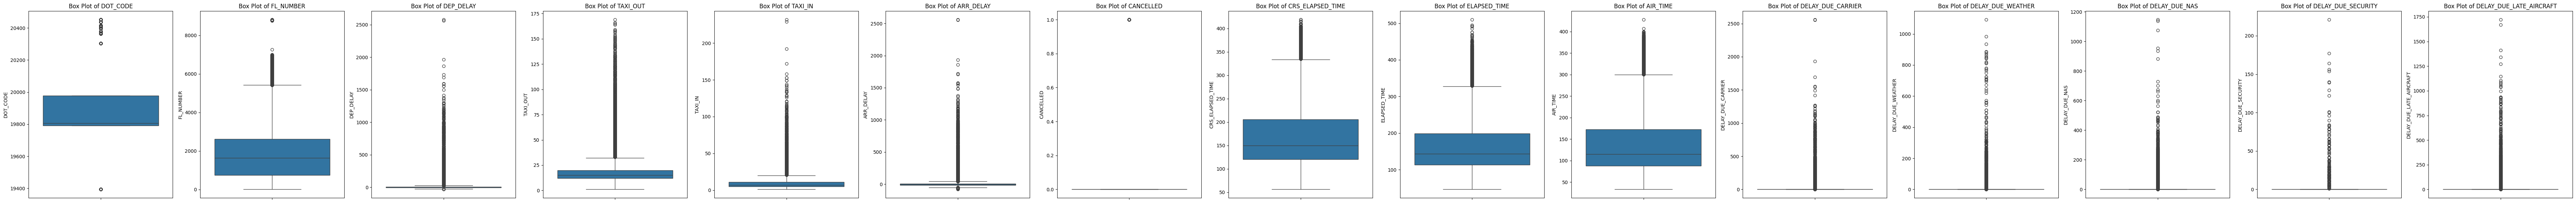

In [27]:
# Visualize outliers using box plots for columns that have them
if columns_with_outliers:
    print(f"\nGenerating box plots for columns with outliers: {columns_with_outliers}")
    plt.figure(figsize=(5 * len(columns_with_outliers), 6))
    for i, col in enumerate(columns_with_outliers):
        plt.subplot(1, len(columns_with_outliers), i + 1)
        sns.boxplot(y=flight_df_filtered[col])
        plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo columns found with outliers to visualize.")

In [28]:
# def handle_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Cap the outliers
#     df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
#     df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
#     print(f"Outliers in '{column}' handled using IQR capping. Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
#     return df

# # Apply outlier handling to 'dep_delay' and 'ARR_DELAY' for flight_df_filtered
# flight_df_filtered = handle_outliers_iqr(flight_df_filtered, 'DEP_DELAY')
# flight_df_filtered = handle_outliers_iqr(flight_df_filtered, 'ARR_DELAY')

# print("\nDescriptive statistics for 'DEP_DELAY' after outlier handling:")
# print(flight_df_filtered['DEP_DELAY'].describe())

# print("\nDescriptive statistics for 'ARR_DELAY' after outlier handling:")
# print(flight_df_filtered['ARR_DELAY'].describe())

In [29]:
flight_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255119 entries, 8 to 2999962
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   FL_DATE                  255119 non-null  object 
 1   AIRLINE                  255119 non-null  object 
 2   AIRLINE_CODE             255119 non-null  object 
 3   DOT_CODE                 255119 non-null  int64  
 4   FL_NUMBER                255119 non-null  int64  
 5   ORIGIN                   255119 non-null  object 
 6   ORIGIN_CITY              255119 non-null  object 
 7   DEST                     255119 non-null  object 
 8   DEST_CITY                255119 non-null  object 
 9   CRS_DEP_TIME             255119 non-null  int64  
 10  DEP_TIME                 248265 non-null  float64
 11  DEP_DELAY                248265 non-null  float64
 12  TAXI_OUT                 248124 non-null  float64
 13  WHEELS_OFF               248124 non-null  float64
 14  WHEELS_O

### Weather

#### Data Information

In [30]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408960 entries, 0 to 408959
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   location_id              408960 non-null  int64  
 1   time                     408960 non-null  object 
 2   temperature_2m (°C)      408960 non-null  float64
 3   precipitation (mm)       408960 non-null  float64
 4   rain (mm)                408960 non-null  float64
 5   snowfall (cm)            408960 non-null  float64
 6   weather_code (wmo code)  408960 non-null  int64  
 7   surface_pressure (hPa)   408960 non-null  float64
 8   cloud_cover (%)          408960 non-null  int64  
 9   cloud_cover_low (%)      408960 non-null  int64  
 10  wind_speed_10m (km/h)    408960 non-null  float64
 11  wind_speed_100m (km/h)   408960 non-null  float64
 12  wind_direction_10m (°)   408960 non-null  int64  
 13  wind_direction_100m (°)  408960 non-null  int64  
 14  wind

Dari informasi diatas dapat dilihat bahwa tidak ada nilai NAN atau Missing value pada weather_df

#### Checking Duplicate

In [31]:
duplicate_rows_weather = weather_df[weather_df.duplicated()]
print(f"Number of duplicate rows in Weather data: {duplicate_rows_weather.shape[0]}")

if not duplicate_rows_weather.empty:
    print("\nFirst 5 duplicate rows in Weather data:")
    print(duplicate_rows_weather.head())

Number of duplicate rows in Weather data: 0


## Standarisasi Data

### Flight

#### Lowercase & Snakecase

In [32]:
flight_df_filtered.columns = flight_df_filtered.columns.str.lower()
flight_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255119 entries, 8 to 2999962
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   fl_date                  255119 non-null  object 
 1   airline                  255119 non-null  object 
 2   airline_code             255119 non-null  object 
 3   dot_code                 255119 non-null  int64  
 4   fl_number                255119 non-null  int64  
 5   origin                   255119 non-null  object 
 6   origin_city              255119 non-null  object 
 7   dest                     255119 non-null  object 
 8   dest_city                255119 non-null  object 
 9   crs_dep_time             255119 non-null  int64  
 10  dep_time                 248265 non-null  float64
 11  dep_delay                248265 non-null  float64
 12  taxi_out                 248124 non-null  float64
 13  wheels_off               248124 non-null  float64
 14  wheels_o

#### Encoding

##### Airline Column

In [33]:
print(f"Total unique airlines: {flight_df_filtered['airline'].nunique()}")
print("Unique airlines:")
print(flight_df_filtered['airline'].unique())

Total unique airlines: 16
Unique airlines:
['Spirit Air Lines' 'United Air Lines Inc.' 'American Airlines Inc.'
 'Republic Airline' 'Delta Air Lines Inc.' 'Southwest Airlines Co.'
 'SkyWest Airlines Inc.' 'Alaska Airlines Inc.' 'Mesa Airlines Inc.'
 'Frontier Airlines Inc.' 'PSA Airlines Inc.'
 'ExpressJet Airlines LLC d/b/a aha!' 'JetBlue Airways'
 'Endeavor Air Inc.' 'Envoy Air' 'Allegiant Air']


In [34]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'airline' column to create 'airlines_encode'
flight_df_filtered['airlines_encode'] = label_encoder.fit_transform(flight_df_filtered['airline'])

print("First 5 rows of flight_df_filtered with the new 'airlines_encode' column:")
print(flight_df_filtered[['airline', 'airlines_encode']].head())

First 5 rows of flight_df_filtered with the new 'airlines_encode' column:
                   airline  airlines_encode
8         Spirit Air Lines               14
18        Spirit Air Lines               14
25   United Air Lines Inc.               15
38  American Airlines Inc.                2
45        Republic Airline               11


In [35]:
print("Airline to Encoding Mapping:")
for i, airline_name in enumerate(label_encoder.classes_):
    print(f"{airline_name}: {i}")

Airline to Encoding Mapping:
Alaska Airlines Inc.: 0
Allegiant Air: 1
American Airlines Inc.: 2
Delta Air Lines Inc.: 3
Endeavor Air Inc.: 4
Envoy Air: 5
ExpressJet Airlines LLC d/b/a aha!: 6
Frontier Airlines Inc.: 7
JetBlue Airways: 8
Mesa Airlines Inc.: 9
PSA Airlines Inc.: 10
Republic Airline: 11
SkyWest Airlines Inc.: 12
Southwest Airlines Co.: 13
Spirit Air Lines: 14
United Air Lines Inc.: 15


##### Airline_Code Column

In [36]:
print(f"Total unique airline_codes: {flight_df_filtered['airline_code'].nunique()}")
print("Unique airline_codes:")
print(flight_df_filtered['airline_code'].unique())

Total unique airline_codes: 16
Unique airline_codes:
['NK' 'UA' 'AA' 'YX' 'DL' 'WN' 'OO' 'AS' 'YV' 'F9' 'OH' 'EV' 'B6' '9E'
 'MQ' 'G4']


In [37]:
# Reusing the label_encoder fitted on 'airline' column for 'airline_code' to maintain consistency
# First, create a mapping from 'airline_code' to 'airline' to ensure correct encoding order
airline_code_to_airline = flight_df_filtered.set_index('airline_code')['airline'].to_dict()

# Ensure the 'airline_code' values are in the same order as 'airline' values were when fitting the encoder
# This step might be tricky if not all airline_codes map uniquely to an airline name in the encoder's classes
# A safer approach is to map directly using the fitted classes if they are ordered correctly

# Assuming the order of airline_code corresponds to the order of airline in label_encoder.classes_
# Or, if we want to ensure the mapping is correct, we can create a temporary series of 'airline' names
# that correspond to each 'airline_code' and then transform that series.

# Let's map airline_code to its corresponding encoded value based on the original airline name
# First, create a dictionary from airline names to their encoded values
airline_to_encoded_map = {name: i for i, name in enumerate(label_encoder.classes_)}

# Now, apply this mapping to create the 'airline_code_encode' column
# This assumes a direct, one-to-one correspondence between airline_code and airline name in the mapping
flight_df_filtered['airline_code_encode'] = flight_df_filtered['airline'].map(airline_to_encoded_map)

print("First 5 rows of flight_df_filtered with the new 'airline_code_encode' column:")
print(flight_df_filtered[['airline_code', 'airline', 'airlines_encode', 'airline_code_encode']].head())

First 5 rows of flight_df_filtered with the new 'airline_code_encode' column:
   airline_code                 airline  airlines_encode  airline_code_encode
8            NK        Spirit Air Lines               14                   14
18           NK        Spirit Air Lines               14                   14
25           UA   United Air Lines Inc.               15                   15
38           AA  American Airlines Inc.                2                    2
45           YX        Republic Airline               11                   11


##### Origin Column

In [38]:
print(f"Total unique Origin: {flight_df_filtered['origin'].nunique()}")
print("Unique Origin:")
print(flight_df_filtered['origin'].unique())

Total unique Origin: 15
Unique Origin:
['IAH' 'DEN' 'ORD' 'DFW' 'LAX' 'DCA' 'PHX' 'LGA' 'ATL' 'JFK' 'IAD' 'CLT'
 'HOU' 'MDW' 'AZA']


In [39]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'origin' column to create 'origins_encode'
flight_df_filtered['origin_encode'] = label_encoder.fit_transform(flight_df_filtered['origin'])

print("First 5 rows of flight_df_filtered with the new 'origin_encode' column:")
print(flight_df_filtered[['origin', 'origin_encode']].head())

First 5 rows of flight_df_filtered with the new 'origin_encode' column:
   origin  origin_encode
8     IAH              8
18    DEN              4
25    ORD             13
38    DFW              5
45    ORD             13


In [40]:
print("Origin Airport to Encoding Mapping:")
for i, airline_name in enumerate(label_encoder.classes_):
    print(f"{airline_name}: {i}")

Origin Airport to Encoding Mapping:
ATL: 0
AZA: 1
CLT: 2
DCA: 3
DEN: 4
DFW: 5
HOU: 6
IAD: 7
IAH: 8
JFK: 9
LAX: 10
LGA: 11
MDW: 12
ORD: 13
PHX: 14


##### Origin_City Column

In [41]:
print(f"Total unique Origin: {flight_df_filtered['origin_city'].nunique()}")
print("Unique Origin City:")
print(flight_df_filtered['origin_city'].unique())

Total unique Origin: 10
Unique Origin City:
['Houston, TX' 'Denver, CO' 'Chicago, IL' 'Dallas/Fort Worth, TX'
 'Los Angeles, CA' 'Washington, DC' 'Phoenix, AZ' 'New York, NY'
 'Atlanta, GA' 'Charlotte, NC']


In [42]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories = [
   ['Chicago, IL',
   'Atlanta, GA',
   'Dallas/Fort Worth, TX',
   'Denver, CO',
   'New York, NY',
   'Charlotte, NC',
   'Houston, TX',
   'Los Angeles, CA',
   'Washington, DC',
   'Phoenix, AZ']
])

flight_df_filtered['origin_cities_encode'] = ordinal_encoder.fit_transform(flight_df_filtered[['origin_city']])

flight_df_filtered['origin_cities_encode'] = flight_df_filtered['origin_cities_encode'].astype(int)

In [43]:
print("Origin City to Encoding Mapping:")
for i, airline_name in enumerate(ordinal_encoder.categories_[0]):
    print(f"{airline_name}: {i}")

Origin City to Encoding Mapping:
Chicago, IL: 0
Atlanta, GA: 1
Dallas/Fort Worth, TX: 2
Denver, CO: 3
New York, NY: 4
Charlotte, NC: 5
Houston, TX: 6
Los Angeles, CA: 7
Washington, DC: 8
Phoenix, AZ: 9


##### Dest Column

In [44]:
print(f"Total unique Dest: {flight_df_filtered['dest'].nunique()}")
print("Unique Dest:")
print(flight_df_filtered['dest'].unique())

Total unique Dest: 15
Unique Dest:
['LAX' 'IAH' 'IAD' 'ORD' 'DCA' 'ATL' 'JFK' 'DEN' 'DFW' 'LGA' 'MDW' 'CLT'
 'PHX' 'HOU' 'AZA']


In [45]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'dest' column to create 'dest_encode'
flight_df_filtered['dest_encode'] = label_encoder.fit_transform(flight_df_filtered['dest'])

print("First 5 rows of flight_df_filtered with the new 'dest_encode' column:")
print(flight_df_filtered[['dest', 'dest_encode']].head())

First 5 rows of flight_df_filtered with the new 'dest_encode' column:
   dest  dest_encode
8   LAX           10
18  IAH            8
25  IAD            7
38  ORD           13
45  DCA            3


In [46]:
print("Destination Airport to Encoding Mapping:")
for i, airline_name in enumerate(label_encoder.classes_):
    print(f"{airline_name}: {i}")

Destination Airport to Encoding Mapping:
ATL: 0
AZA: 1
CLT: 2
DCA: 3
DEN: 4
DFW: 5
HOU: 6
IAD: 7
IAH: 8
JFK: 9
LAX: 10
LGA: 11
MDW: 12
ORD: 13
PHX: 14


##### Dest_City Column

In [47]:
print(f"Total unique Dest_City: {flight_df_filtered['dest_city'].nunique()}")
print("Unique Dest_city_City:")
print(flight_df_filtered['dest_city'].unique())

Total unique Dest_City: 10
Unique Dest_city_City:
['Los Angeles, CA' 'Houston, TX' 'Washington, DC' 'Chicago, IL'
 'Atlanta, GA' 'New York, NY' 'Denver, CO' 'Dallas/Fort Worth, TX'
 'Charlotte, NC' 'Phoenix, AZ']


In [48]:
flight_df_filtered['dest_cities_encode'] = ordinal_encoder.fit_transform(flight_df_filtered[['dest_city']])

flight_df_filtered['dest_cities_encode'] = flight_df_filtered['dest_cities_encode'].astype(int)

In [49]:
print("Destination City to Encoding Mapping:")
for i, airline_name in enumerate(ordinal_encoder.categories_[0]):
    print(f"{airline_name}: {i}")

Destination City to Encoding Mapping:
Chicago, IL: 0
Atlanta, GA: 1
Dallas/Fort Worth, TX: 2
Denver, CO: 3
New York, NY: 4
Charlotte, NC: 5
Houston, TX: 6
Los Angeles, CA: 7
Washington, DC: 8
Phoenix, AZ: 9


##### Fl_Date Column

Pada column ini kita hanya menghapus tanda "-" di format tanggalnya lalu merubah tipenya menjadi int.

Format tanggal = yyyy/mm/dd

In [50]:
flight_df_filtered['fl_date'] = flight_df_filtered['fl_date'].str.replace('-', '').astype(int)

print("Data type of 'fl_date' column after transformation:")
print(flight_df_filtered['fl_date'].dtype)
print("First 5 rows of 'fl_date' after transformation:")
print(flight_df_filtered['fl_date'].head())

Data type of 'fl_date' column after transformation:
int64
First 5 rows of 'fl_date' after transformation:
8     20230212
18    20190324
25    20190423
38    20191102
45    20220102
Name: fl_date, dtype: int64


#### Consistency Data Types for Every Column

In [51]:
flight_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255119 entries, 8 to 2999962
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   fl_date                  255119 non-null  int64  
 1   airline                  255119 non-null  object 
 2   airline_code             255119 non-null  object 
 3   dot_code                 255119 non-null  int64  
 4   fl_number                255119 non-null  int64  
 5   origin                   255119 non-null  object 
 6   origin_city              255119 non-null  object 
 7   dest                     255119 non-null  object 
 8   dest_city                255119 non-null  object 
 9   crs_dep_time             255119 non-null  int64  
 10  dep_time                 248265 non-null  float64
 11  dep_delay                248265 non-null  float64
 12  taxi_out                 248124 non-null  float64
 13  wheels_off               248124 non-null  float64
 14  wheels_o

Pada kolom yang memiliki informasi waktu (CRS_DEP_TIME, DEP_TIME, CRS_ARR_TIME, ARR_TIME, dsb) tipe datanya ada yang masih int dan float. Karena nilai datanya pada satuan menit (misal CRS_DEP_TIME = 1151 (11.51) dan DEP_TIME = 15.0 (15 menit) maka kami putuskan untuk mengubahnya menjadi int. Hal yang sama juga diterapkan untuk kolom dengan nilai biner (CANCELLED dan DIVERTED).

Pada penerbangan yang dicancel, nilai kolom DEP_TIME, ARR_TIME, dsb masih berupa NaN. Karena tipe data int tidak bisa menghandle missing value, maka kami lakukan imputasi tambahan untuk missing value tersebut.

In [52]:
time_related_nullable_columns = [
    'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on',
    'taxi_in', 'arr_time', 'arr_delay', 'elapsed_time', 'air_time'
]

# Filter for rows where CANCELLED is 1
cancelled_flights_mask = flight_df_filtered['cancelled'] == 1

# Fill NaN values in specified time columns with 0 for cancelled flights
for col in time_related_nullable_columns:
    flight_df_filtered.loc[cancelled_flights_mask, col] = flight_df_filtered.loc[cancelled_flights_mask, col].fillna(0)

print("Missing values in time-related columns after handling cancelled flights:")
flight_df_filtered.isnull().sum()

Missing values in time-related columns after handling cancelled flights:


,0
fl_date,0
airline,0
airline_code,0
dot_code,0
fl_number,0
origin,0
origin_city,0
dest,0
dest_city,0
crs_dep_time,0


Setelah tidak ada missing value, kami ubah kolom numerik menjadi bertipe int.

In [53]:
float_cols_to_int = [
    'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on',
    'taxi_in', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
    'crs_elapsed_time', 'elapsed_time', 'air_time', 'distance',
    'delay_due_carrier', 'delay_due_weather', 'delay_due_nas',
    'delay_due_security', 'delay_due_late_aircraft'
]

for col in float_cols_to_int:
    flight_df_filtered[col] = flight_df_filtered[col].astype(int)

print("Data types after converting specified float columns to int:")
flight_df_filtered.info()

Data types after converting specified float columns to int:
<class 'pandas.core.frame.DataFrame'>
Index: 255119 entries, 8 to 2999962
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   fl_date                  255119 non-null  int64 
 1   airline                  255119 non-null  object
 2   airline_code             255119 non-null  object
 3   dot_code                 255119 non-null  int64 
 4   fl_number                255119 non-null  int64 
 5   origin                   255119 non-null  object
 6   origin_city              255119 non-null  object
 7   dest                     255119 non-null  object
 8   dest_city                255119 non-null  object
 9   crs_dep_time             255119 non-null  int64 
 10  dep_time                 255119 non-null  int64 
 11  dep_delay                255119 non-null  int64 
 12  taxi_out                 255119 non-null  int64 
 13  wheels_off        

### Weather

In [54]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408960 entries, 0 to 408959
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   location_id              408960 non-null  int64  
 1   time                     408960 non-null  object 
 2   temperature_2m (°C)      408960 non-null  float64
 3   precipitation (mm)       408960 non-null  float64
 4   rain (mm)                408960 non-null  float64
 5   snowfall (cm)            408960 non-null  float64
 6   weather_code (wmo code)  408960 non-null  int64  
 7   surface_pressure (hPa)   408960 non-null  float64
 8   cloud_cover (%)          408960 non-null  int64  
 9   cloud_cover_low (%)      408960 non-null  int64  
 10  wind_speed_10m (km/h)    408960 non-null  float64
 11  wind_speed_100m (km/h)   408960 non-null  float64
 12  wind_direction_10m (°)   408960 non-null  int64  
 13  wind_direction_100m (°)  408960 non-null  int64  
 14  wind

berdasarkan informasi diatas hanya terdapat 1 tipe data object saja yakni pada column time sehingga hanya tipe data ini saja yang kita lakukan encoding

In [55]:
weather_df.head()

,location_id,time,temperature_2m (°C),precipitation (mm),rain (mm),snowfall (cm),weather_code (wmo code),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),wind_gusts_10m (km/h)
0,0,2019-01-01T00:00,1.2,0.0,0.0,0.0,3,992.4,100,100,17.7,29.1,321,326,30.2
1,0,2019-01-01T01:00,1.1,0.0,0.0,0.0,3,993.9,100,100,16.6,26.7,321,328,25.9
2,0,2019-01-01T02:00,0.9,0.0,0.0,0.0,3,995.5,100,100,19.2,29.2,332,338,27.4
3,0,2019-01-01T03:00,0.4,0.0,0.0,0.0,3,997.0,100,100,20.2,29.7,338,341,30.2
4,0,2019-01-01T04:00,-0.2,0.0,0.0,0.0,3,998.1,100,100,21.0,30.0,344,346,30.6


Jika kita lihat bentuknya kami tidak mungkin langsung merubah menjadi angka random. kami berencana untuk mempertahankan bentuk aslinya sehingga kami akan menghapus tanda "-" dan T pada isi column tersebut. Untuk membuatnya lebih mudah dibaca kami akan menambahkan 2 column baru yakni date dan time. column ini dipisah agar tidak memusingkan jika dibaca dalam satu column.

Format:
- date = yyyy/mm/dd
- time = xx:xx -> if 0 means 00:00, 100 means 01:00, etc.

In [56]:
# Extract date and time parts
weather_df['date'] = weather_df['time'].apply(lambda x: x.split('T')[0].replace('-', '')).astype(int)
weather_df['time_hour_minute'] = weather_df['time'].apply(lambda x: x.split('T')[1].replace(':', '')).astype(int)

print("First 5 rows of weather_df with new 'date' and 'time_hour_minute' columns:")
print(weather_df[['time', 'date', 'time_hour_minute']].head())

print("\nData types of new columns:")
print(weather_df[['date', 'time_hour_minute']].dtypes)

First 5 rows of weather_df with new 'date' and 'time_hour_minute' columns:
               time      date  time_hour_minute
0  2019-01-01T00:00  20190101                 0
1  2019-01-01T01:00  20190101               100
2  2019-01-01T02:00  20190101               200
3  2019-01-01T03:00  20190101               300
4  2019-01-01T04:00  20190101               400

Data types of new columns:
date                int64
time_hour_minute    int64
dtype: object


In [57]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408960 entries, 0 to 408959
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   location_id              408960 non-null  int64  
 1   time                     408960 non-null  object 
 2   temperature_2m (°C)      408960 non-null  float64
 3   precipitation (mm)       408960 non-null  float64
 4   rain (mm)                408960 non-null  float64
 5   snowfall (cm)            408960 non-null  float64
 6   weather_code (wmo code)  408960 non-null  int64  
 7   surface_pressure (hPa)   408960 non-null  float64
 8   cloud_cover (%)          408960 non-null  int64  
 9   cloud_cover_low (%)      408960 non-null  int64  
 10  wind_speed_10m (km/h)    408960 non-null  float64
 11  wind_speed_100m (km/h)   408960 non-null  float64
 12  wind_direction_10m (°)   408960 non-null  int64  
 13  wind_direction_100m (°)  408960 non-null  int64  
 14  wind

## Data Enrichment dan Feature Engineering


Pada bagian ini akan dilakukan tahap penggabungan 2 df menjadi satu dan membuat 5 fitur baru.

### Join DF

In [58]:
flight_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255119 entries, 8 to 2999962
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   fl_date                  255119 non-null  int64 
 1   airline                  255119 non-null  object
 2   airline_code             255119 non-null  object
 3   dot_code                 255119 non-null  int64 
 4   fl_number                255119 non-null  int64 
 5   origin                   255119 non-null  object
 6   origin_city              255119 non-null  object
 7   dest                     255119 non-null  object
 8   dest_city                255119 non-null  object
 9   crs_dep_time             255119 non-null  int64 
 10  dep_time                 255119 non-null  int64 
 11  dep_delay                255119 non-null  int64 
 12  taxi_out                 255119 non-null  int64 
 13  wheels_off               255119 non-null  int64 
 14  wheels_on               

In [59]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408960 entries, 0 to 408959
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   location_id              408960 non-null  int64  
 1   time                     408960 non-null  object 
 2   temperature_2m (°C)      408960 non-null  float64
 3   precipitation (mm)       408960 non-null  float64
 4   rain (mm)                408960 non-null  float64
 5   snowfall (cm)            408960 non-null  float64
 6   weather_code (wmo code)  408960 non-null  int64  
 7   surface_pressure (hPa)   408960 non-null  float64
 8   cloud_cover (%)          408960 non-null  int64  
 9   cloud_cover_low (%)      408960 non-null  int64  
 10  wind_speed_10m (km/h)    408960 non-null  float64
 11  wind_speed_100m (km/h)   408960 non-null  float64
 12  wind_direction_10m (°)   408960 non-null  int64  
 13  wind_direction_100m (°)  408960 non-null  int64  
 14  wind

sebelum dilakukan penggabungan 3 df ada yang perlu dijadikan patokkan. dalam kasus ini kami memutuskan akan menggunakan column 5 column pada dataframe flight dan 3 column pada dataframe weather. flight akan memiliki data weather sebelum berangkat dan pada saat jadwal sampai. itulah mengapa kita perlu 5 column pada dataframe flight. berikut merupakan column yang digunakan.

Flight:
- fl_date
- origin_city_encoded
- dest_city_encoded
- crs_dep_time_rounded
- crs_arr_time_rounded

Weather:
- date
- time_hour_minute
- location_id

sebelum kita menggabungkan kolom tersebut, kita perlu menseragamkan format waktunya terutama dibagian jamnya karena masih terdapat menit. ini akan kita bulatkan kebawah untuk menyesuaikan data waktu yang ada pada dataframe di weather.

In [60]:
import numpy as np

# Round down crs_dep_time to the nearest hundred (e.g., 1151 becomes 1100)
# The columns are already integer type based on previous steps.
flight_df_filtered['crs_dep_time_rounded'] = (flight_df_filtered['crs_dep_time'] // 100 * 100).astype(int)

# Find the index of the 'crs_dep_time' column
crs_dep_time_idx = flight_df_filtered.columns.get_loc('crs_dep_time')

# Insert the new 'crs_dep_time_rounded' column next to 'crs_dep_time'
flight_df_filtered.insert(crs_dep_time_idx + 1, 'crs_dep_time_rounded', flight_df_filtered.pop('crs_dep_time_rounded'))

# Round down crs_arr_time to the nearest hundred (e.g., 1151 becomes 1100)
flight_df_filtered['crs_arr_time_rounded'] = (flight_df_filtered['crs_arr_time'] // 100 * 100).astype(int)

# Find the index of the 'crs_arr_time' column
crs_arr_time_idx = flight_df_filtered.columns.get_loc('crs_arr_time')

# Insert the new 'crs_arr_time_rounded' column next to 'crs_arr_time'
flight_df_filtered.insert(crs_arr_time_idx + 1, 'crs_arr_time_rounded', flight_df_filtered.pop('crs_arr_time_rounded'))

print("First 5 rows with new rounded time columns:")
print(flight_df_filtered[['crs_dep_time', 'crs_dep_time_rounded', 'crs_arr_time', 'crs_arr_time_rounded']].head())
print("\nData types of new rounded columns:")
print(flight_df_filtered[['crs_dep_time_rounded', 'crs_arr_time_rounded']].dtypes)

First 5 rows with new rounded time columns:
    crs_dep_time  crs_dep_time_rounded  crs_arr_time  crs_arr_time_rounded
8            530                   500           717                   700
18          1530                  1500          1858                  1800
25          1330                  1300          1620                  1600
38          1851                  1800          2119                  2100
45          1935                  1900          2241                  2200

Data types of new rounded columns:
crs_dep_time_rounded    int64
crs_arr_time_rounded    int64
dtype: object


In [61]:
weather_df.head()

,location_id,time,temperature_2m (°C),precipitation (mm),rain (mm),snowfall (cm),weather_code (wmo code),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),wind_gusts_10m (km/h),date,time_hour_minute
0,0,2019-01-01T00:00,1.2,0.0,0.0,0.0,3,992.4,100,100,17.7,29.1,321,326,30.2,20190101,0
1,0,2019-01-01T01:00,1.1,0.0,0.0,0.0,3,993.9,100,100,16.6,26.7,321,328,25.9,20190101,100
2,0,2019-01-01T02:00,0.9,0.0,0.0,0.0,3,995.5,100,100,19.2,29.2,332,338,27.4,20190101,200
3,0,2019-01-01T03:00,0.4,0.0,0.0,0.0,3,997.0,100,100,20.2,29.7,338,341,30.2,20190101,300
4,0,2019-01-01T04:00,-0.2,0.0,0.0,0.0,3,998.1,100,100,21.0,30.0,344,346,30.6,20190101,400


sekarang masuk kedalam proses mergingnya

In [62]:
# Rename columns in weather_df to match flight_df_filtered for merging
weather_df_origin = weather_df.rename(columns={
    'date': 'fl_date',
    'location_id': 'origin_cities_encode',
    'time_hour_minute': 'crs_dep_time_rounded'
})

# Select and prefix columns from weather_df for origin weather
weather_origin_cols = {}
for col in weather_df_origin.columns:
    if col not in ['fl_date', 'origin_cities_encode', 'crs_dep_time_rounded']:
        weather_origin_cols[col] = 'origin_' + col.replace(' ', '_').replace('(', '').replace(')', '').replace('°C', 'c').replace('%', 'percent').replace('(mm)', 'mm').replace('(hPa)', 'hpa').replace('(cm)', 'cm').replace('(wmo_code)', 'wmo_code').replace('(km/h)', 'kmh').replace('(_)', 'degree')

weather_df_origin_processed = weather_df_origin.rename(columns=weather_origin_cols)

# Ensure only relevant columns from weather_df_origin_processed are used for merging
# Include merge keys and the new prefixed columns
columns_to_keep_origin_weather = [
    'fl_date', 'origin_cities_encode', 'crs_dep_time_rounded'
] + list(weather_origin_cols.values())

weather_df_origin_processed = weather_df_origin_processed[columns_to_keep_origin_weather]

# Perform a left merge with flight_df_filtered for origin weather
flight_df_merged = pd.merge(
    flight_df_filtered,
    weather_df_origin_processed,
    on=['fl_date', 'origin_cities_encode', 'crs_dep_time_rounded'],
    how='left'
)

print("Shape of merged DataFrame:", flight_df_merged.shape)
print("First 5 rows of merged DataFrame (showing relevant origin weather columns):")
print(flight_df_merged[[
    'fl_date', 'origin_city', 'origin_cities_encode', 'crs_dep_time_rounded',
    'origin_temperature_2m_c', 'origin_precipitation_mm', 'origin_rain_mm'
]].head())

Shape of merged DataFrame: (255119, 52)
First 5 rows of merged DataFrame (showing relevant origin weather columns):
    fl_date            origin_city  origin_cities_encode  \
0  20230212            Houston, TX                     6   
1  20190324             Denver, CO                     3   
2  20190423            Chicago, IL                     0   
3  20191102  Dallas/Fort Worth, TX                     2   
4  20220102            Chicago, IL                     0   

   crs_dep_time_rounded  origin_temperature_2m_c  origin_precipitation_mm  \
0                   500                      3.2                      0.0   
1                  1500                     13.6                      0.0   
2                  1300                     10.8                      0.0   
3                  1800                     10.6                      0.0   
4                  1900                     -7.7                      0.0   

   origin_rain_mm  
0             0.0  
1             0.0  


In [63]:
flight_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255119 entries, 0 to 255118
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   fl_date                         255119 non-null  int64  
 1   airline                         255119 non-null  object 
 2   airline_code                    255119 non-null  object 
 3   dot_code                        255119 non-null  int64  
 4   fl_number                       255119 non-null  int64  
 5   origin                          255119 non-null  object 
 6   origin_city                     255119 non-null  object 
 7   dest                            255119 non-null  object 
 8   dest_city                       255119 non-null  object 
 9   crs_dep_time                    255119 non-null  int64  
 10  crs_dep_time_rounded            255119 non-null  int64  
 11  dep_time                        255119 non-null  int64  
 12  dep_delay       

In [64]:
# Rename columns in weather_df to match flight_df_merged for destination merging
weather_df_dest = weather_df.rename(columns={
    'date': 'fl_date',
    'location_id': 'dest_cities_encode',
    'time_hour_minute': 'crs_arr_time_rounded'
})

# Select and prefix columns from weather_df for destination weather
weather_dest_cols = {}
for col in weather_df_dest.columns:
    if col not in ['fl_date', 'dest_cities_encode', 'crs_arr_time_rounded']:
        weather_dest_cols[col] = 'dest_' + col.replace(' ', '_').replace('(', '').replace(')', '').replace('°C', 'c').replace('%', 'percent').replace('(mm)', 'mm').replace('(hPa)', 'hpa').replace('(cm)', 'cm').replace('(wmo_code)', 'wmo_code').replace('(km/h)', 'kmh').replace('(_)', 'degree')

weather_df_dest_processed = weather_df_dest.rename(columns=weather_dest_cols)

# Ensure only relevant columns from weather_df_dest_processed are used for merging
# Include merge keys and the new prefixed columns
columns_to_keep_dest_weather = [
    'fl_date', 'dest_cities_encode', 'crs_arr_time_rounded'
] + list(weather_dest_cols.values())

weather_df_dest_processed = weather_df_dest_processed[columns_to_keep_dest_weather]

# Perform a left merge with flight_df_merged for destination weather
final_merged_df = pd.merge(
    flight_df_merged,
    weather_df_dest_processed,
    on=['fl_date', 'dest_cities_encode', 'crs_arr_time_rounded'],
    how='left'
)

print("Shape of final merged DataFrame:", final_merged_df.shape)
print("First 5 rows of final merged DataFrame (showing relevant destination weather columns):")
print(final_merged_df[[
    'fl_date', 'dest_city', 'dest_cities_encode', 'crs_arr_time_rounded',
    'dest_temperature_2m_c', 'dest_precipitation_mm', 'dest_rain_mm'
]].head())

Shape of final merged DataFrame: (255119, 66)
First 5 rows of final merged DataFrame (showing relevant destination weather columns):
    fl_date        dest_city  dest_cities_encode  crs_arr_time_rounded  \
0  20230212  Los Angeles, CA                   7                   700   
1  20190324      Houston, TX                   6                  1800   
2  20190423   Washington, DC                   8                  1600   
3  20191102      Chicago, IL                   0                  2100   
4  20220102   Washington, DC                   8                  2200   

   dest_temperature_2m_c  dest_precipitation_mm  dest_rain_mm  
0                    6.7                    0.0           0.0  
1                   22.0                    0.0           0.0  
2                   25.4                    0.0           0.0  
3                    2.5                    0.0           0.0  
4                    8.7                    0.0           0.0  


In [65]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255119 entries, 0 to 255118
Data columns (total 66 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   fl_date                         255119 non-null  int64  
 1   airline                         255119 non-null  object 
 2   airline_code                    255119 non-null  object 
 3   dot_code                        255119 non-null  int64  
 4   fl_number                       255119 non-null  int64  
 5   origin                          255119 non-null  object 
 6   origin_city                     255119 non-null  object 
 7   dest                            255119 non-null  object 
 8   dest_city                       255119 non-null  object 
 9   crs_dep_time                    255119 non-null  int64  
 10  crs_dep_time_rounded            255119 non-null  int64  
 11  dep_time                        255119 non-null  int64  
 12  dep_delay       

### Feature Engineering

#### temp_2m_c_diff

kolom ini dibuat dengan tujuan untuk melihat selisih temperatur atau suhu pada lokasi awal dengan destinasi.

Pengaruh perbedaan suhu dalam penerbangan pesawat.
- Suhu mempengaruhi kepadatan udara:
  - Udara panas -> lebih ringan -> lift berkurang
  - Udara dingin -> lebih padat -> lift bertambah
- Jika selisih suhu besar:
  - Pesawat harus menyesuaikan performa mesin
  - Perubahan konfigurasi approach
  - Potensi unstable approach
- Dampak Operasional:
  - Runway performance calculation berubah
  - Bisa terjadi go-around
  - Arrival delay meningkat



In [66]:
final_merged_df['temp_2m_c_diff'] = final_merged_df['dest_temperature_2m_c'] - final_merged_df['origin_temperature_2m_c']

print("First 5 rows with new 'temp_2m_c_diff' column:")
print(final_merged_df[['origin_temperature_2m_c', 'dest_temperature_2m_c', 'temp_2m_c_diff']].head())

First 5 rows with new 'temp_2m_c_diff' column:
   origin_temperature_2m_c  dest_temperature_2m_c  temp_2m_c_diff
0                      3.2                    6.7             3.5
1                     13.6                   22.0             8.4
2                     10.8                   25.4            14.6
3                     10.6                    2.5            -8.1
4                     -7.7                    8.7            16.4


#### surface_pressure_hPa_diff

Kolom ini dibuat dengan tujuan untuk melihat selisih surface pressure pada lokasi awal dengan destinasi

Pengaruh perbedaan tekanan udara di daratan dalam penerbangan pesawat.
- Tekanan udara rendah biasanya terkait:
  - sistem badai
  - Hujan, awan tebal, dan angin kuat
- Selisih tekanan besar -> indikasi front cuaca aktif.
- Dampak Operasional:
  - Holding pattern
  - Runway configuration berubah
  - ATC spacing diperlebar
  - Arrival delay

In [67]:
final_merged_df['surface_pressure_hPa_diff'] = final_merged_df['dest_surface_pressure_hPa'] - final_merged_df['origin_surface_pressure_hPa']

print("First 5 rows with new 'surface_pressure_hPa_diff' column:")
print(final_merged_df[['origin_surface_pressure_hPa', 'dest_surface_pressure_hPa', 'surface_pressure_hPa_diff']].head())

First 5 rows with new 'surface_pressure_hPa_diff' column:
   origin_surface_pressure_hPa  dest_surface_pressure_hPa  \
0                       1021.6                     1002.2   
1                        840.2                     1015.5   
2                        996.1                     1009.5   
3                       1009.5                      999.9   
4                       1003.5                     1013.3   

   surface_pressure_hPa_diff  
0                      -19.4  
1                      175.3  
2                       13.4  
3                       -9.6  
4                        9.8  


#### wind_speed_10m_km/h_diff

kolom ini dibuat dengan tujuan untuk melihat selisih wind speed di 10m pada lokasi awal dengan destinasi.

Pengaruh perbedaan kecepatan udara di daratan dalam penerbangan pesawat.
- Angin permukaan berpengaruh langsung pada:
  - Taxi
  - Takeoff
  - Landing
- Jika angin di destinasi jauh lebih kuat:
  - Pesawat lebih sulit untuk mendarat
  - Runway yang bisa dipakai terbatas
  - Potensi go-around
- Dampak Operasional:
  - Arrival rate bandara menurun
  - Antrean landing
  - Delay meningkat

In [68]:
final_merged_df['wind_speed_10m_km_h_diff'] = final_merged_df['dest_wind_speed_10m_km/h'] - final_merged_df['origin_wind_speed_10m_km/h']

print("First 5 rows with new 'wind_speed_10m_km_h_diff' column:")
print(final_merged_df[['origin_wind_speed_10m_km/h', 'dest_wind_speed_10m_km/h', 'wind_speed_10m_km_h_diff']].head())

First 5 rows with new 'wind_speed_10m_km_h_diff' column:
   origin_wind_speed_10m_km/h  dest_wind_speed_10m_km/h  \
0                         6.6                       6.3   
1                         6.8                      18.0   
2                        17.7                      14.7   
3                         8.9                      17.0   
4                        16.9                      18.1   

   wind_speed_10m_km_h_diff  
0                      -0.3  
1                      11.2  
2                      -3.0  
3                       8.1  
4                       1.2  


#### wind_speed_100m_km/h_diff

kolom ini dibuat dengan tujuan untuk melihat selisih wind speed di 100m pada lokasi awal dengan destinasi

Pengaruh perbedaan kecepatan udara di atas dalam penerbangan pesawat.
- angin di 100m memengaruhi:
  - Stabilitas approach
  - Vertical wind shear
  - Turbulensi
- Selisih besar -> udara tidak stabil
- Dampak Operasional
  - Unstable approach
  - Holding / go-around
  - spacing antar pesawat diperbesar

In [69]:
final_merged_df['wind_speed_100m_km_h_diff'] = final_merged_df['dest_wind_speed_100m_km/h'] - final_merged_df['origin_wind_speed_100m_km/h']

print("First 5 rows with new 'wind_speed_100m_km_h_diff' column:")
print(final_merged_df[['origin_wind_speed_100m_km/h', 'dest_wind_speed_100m_km/h', 'wind_speed_100m_km_h_diff']].head())

First 5 rows with new 'wind_speed_100m_km_h_diff' column:
   origin_wind_speed_100m_km/h  dest_wind_speed_100m_km/h  \
0                         14.9                        9.8   
1                          8.3                       27.9   
2                         20.1                       23.8   
3                         10.7                       26.6   
4                         26.0                       28.2   

   wind_speed_100m_km_h_diff  
0                       -5.1  
1                       19.6  
2                        3.7  
3                       15.9  
4                        2.2  


#### dest_cloud_cover_diff

kolom ini dibuat dengan tujuan untuk melihat selisih dest_cloud_cover pada percent dengan low_percent

Pengaruh selisih intensitas awan pada penerbangan pesawat:
- ini indikator ceiling (ketinggian awan rendah).
  - Low cloud tinggi -> visibilitas rendah
  - Instrument approach wajib
  - kapasitas bandara menurun
- Dampak Operasional
  - Arrival delay
  - Go-around
  - Diversion pada kasus ekstrem

In [70]:
final_merged_df['dest_cloud_cover_diff'] = final_merged_df['dest_cloud_cover_percent'] - final_merged_df['dest_cloud_cover_low_percent']

print("First 5 rows with new 'dest_cloud_cover_diff' column:")
print(final_merged_df[['dest_cloud_cover_percent', 'dest_cloud_cover_low_percent', 'dest_cloud_cover_diff']].head())

First 5 rows with new 'dest_cloud_cover_diff' column:
   dest_cloud_cover_percent  dest_cloud_cover_low_percent  \
0                        86                            16   
1                        81                            10   
2                        77                             0   
3                        13                            11   
4                       100                            39   

   dest_cloud_cover_diff  
0                     70  
1                     71  
2                     77  
3                      2  
4                     61  


## Validasi Data

### Uniqueness Check

Uniqueness check dilakukan untuk memeriksa data duplikat setelah merge data penerbangan dengan data cuaca, berdasarkan FL_DATE, ORIGIN_CITY_ENCODED, CRS_DEP_TIME_ROUNDED, DEST_CITY_ENCODED, dan CRS_ARR_TIME_ROUNDED

In [71]:
print("=== 1. UNIQUENESS CHECK ===")
# Hitung jumlah baris sebelum dan sesudah
rows_before = len(flight_df_filtered)
rows_after = len(flight_df_merged)

print(f"Rows Before Merge: {rows_before}")
print(f"Rows After Merge : {rows_after}")

if rows_after > rows_before:
    print(f"❌ WARNING: Terjadi duplikasi! Ada {rows_after - rows_before} baris tambahan.")
    print("Saran: Cek duplikasi di weather_df pada kolom ['fl_date', 'origin_cities_encode', 'crs_dep_time_rounded']")
    # Cek duplikasi di weather source
    dupes_weather = weather_df_origin_processed[weather_df_origin_processed.duplicated(subset=['fl_date', 'origin_cities_encode', 'crs_dep_time_rounded', 'dest_cities_encoded', 'crs_arr_time_rounded'], keep=False)]
    if not dupes_weather.empty:
        print("Sampel duplikasi di data cuaca:")
        print(dupes_weather.head())
elif rows_after < rows_before:
    print(f"❌ ERROR: Data berkurang! (Seharusnya tidak terjadi pada Left Join)")
else:
    print("✅ PASS: Jumlah baris konsisten (One-to-One atau Many-to-One relationship aman).")

=== 1. UNIQUENESS CHECK ===
Rows Before Merge: 255119
Rows After Merge : 255119
✅ PASS: Jumlah baris konsisten (One-to-One atau Many-to-One relationship aman).


### Null check

Null Check dilakukan untuk memeriksa missing value setiap kolom setelah dilakukan transformasi & merging.

In [72]:
print("\n=== 2. NULL CHECK (Missing Weather Data) ===")
# Fokus pada kolom cuaca baru (yang berawalan 'origin_' dan 'dest_')
new_weather_cols = [col for col in final_merged_df.columns if col.startswith('origin_') or col.startswith('dest_')]

# Hitung null
null_counts = final_merged_df[new_weather_cols].isnull().sum()
null_pct = (null_counts / len(final_merged_df)) * 100

print(f"Total Baris: {len(final_merged_df)}")
print("Missing Values per Column:")
print(pd.DataFrame({'Missing Count': null_counts, 'Percentage (%)': null_pct}))

# Threshold warning (misal 5%)
if null_pct.max() > 5:
    print("⚠️ WARNING: Lebih dari 5% data penerbangan tidak memiliki data cuaca.")
else:
    print("✅ PASS: Missing data masih dalam batas toleransi.")


=== 2. NULL CHECK (Missing Weather Data) ===
Total Baris: 255119
Missing Values per Column:
                                Missing Count  Percentage (%)
origin_city                                 0             0.0
dest_city                                   0             0.0
origin_encode                               0             0.0
origin_cities_encode                        0             0.0
dest_encode                                 0             0.0
dest_cities_encode                          0             0.0
origin_time                                 0             0.0
origin_temperature_2m_c                     0             0.0
origin_precipitation_mm                     0             0.0
origin_rain_mm                              0             0.0
origin_snowfall_cm                          0             0.0
origin_weather_code_wmo_code                0             0.0
origin_surface_pressure_hPa                 0             0.0
origin_cloud_cover_percent             

### Range Check

Range Check dilakukan untuk memeriksa apakah terdapat nilai suatu variabel yang tidak masuk akal, seperti nilai persentase di atas 100% atau nilai negatif pada angka curah hujan.

In [73]:
print("\n=== 3. RANGE CHECK ===")

# Definisikan batasan logis
constraints = {
    'origin_temperature_2m_c': (-35, 60),  # Suhu bumi wajar
    'dest_temperature_2m_c': (-35, 60),    # Suhu bumi wajar
    'origin_precipitation_mm': (0, 500),   # Hujan tidak boleh negatif
    'dest_precipitation_mm': (0, 500),     # Hujan tidak boleh negatif
    'origin_wind_speed_10m_km/h': (0, 200),# Angin tidak boleh negatif
    'dest_wind_speed_10m_km/h': (0, 200),  # Angin tidak boleh negatif
    'origin_cloud_cover_percent': (0, 100),# Persen harus 0-100
    'dest_cloud_cover_percent': (0, 100),  # Persen harus 0-100
    'origin_surface_pressure_hPa': (800, 1050), # Atmospheric pressure range
    'dest_surface_pressure_hPa': (800, 1050)   # Atmospheric pressure range
}

for col, (min_val, max_val) in constraints.items():
    if col in final_merged_df.columns: # Use final_merged_df
        outliers = final_merged_df[(final_merged_df[col] < min_val) | (final_merged_df[col] > max_val)]
        if not outliers.empty:
            print(f"❌ FAIL: Kolom '{col}' memiliki {len(outliers)} nilai di luar range ({min_val} - {max_val}).")
            print(f"   Min Found: {final_merged_df[col].min()}, Max Found: {final_merged_df[col].max()}")
        else:
            print(f"✅ PASS: Kolom '{col}' aman dalam range {min_val} s/d {max_val}.")


=== 3. RANGE CHECK ===
✅ PASS: Kolom 'origin_temperature_2m_c' aman dalam range -35 s/d 60.
✅ PASS: Kolom 'dest_temperature_2m_c' aman dalam range -35 s/d 60.
✅ PASS: Kolom 'origin_precipitation_mm' aman dalam range 0 s/d 500.
✅ PASS: Kolom 'dest_precipitation_mm' aman dalam range 0 s/d 500.
✅ PASS: Kolom 'origin_wind_speed_10m_km/h' aman dalam range 0 s/d 200.
✅ PASS: Kolom 'dest_wind_speed_10m_km/h' aman dalam range 0 s/d 200.
✅ PASS: Kolom 'origin_cloud_cover_percent' aman dalam range 0 s/d 100.
✅ PASS: Kolom 'dest_cloud_cover_percent' aman dalam range 0 s/d 100.
✅ PASS: Kolom 'origin_surface_pressure_hPa' aman dalam range 800 s/d 1050.
✅ PASS: Kolom 'dest_surface_pressure_hPa' aman dalam range 800 s/d 1050.


### Data Type Consistency

Data Type Consistency dilakukan untuk mengecek keseragaman tipe data pada masing-masing kolom & memastikan tidak ada tipe data campuran pada kolom tersebut.

In [74]:
print("\n=== 4. DATA TYPE CONSISTENCY CHECK ===")

# Get current data types of all columns in the final merged DataFrame
current_dtypes = final_merged_df.dtypes

print("Current Data Types of all columns:")
print(current_dtypes)

# Define expected data types for a more rigorous check
# This is based on the previous cleaning and transformation steps
expected_dtypes = {
    'fl_date': 'int64',
    'airline': 'object',
    'airline_code': 'object',
    'dot_code': 'int64',
    'fl_number': 'int64',
    'origin': 'object',
    'origin_city': 'object',
    'dest': 'object',
    'dest_city': 'object',
    'crs_dep_time': 'int64',
    'crs_dep_time_rounded': 'int64',
    'dep_time': 'int64',
    'dep_delay': 'int64',
    'taxi_out': 'int64',
    'wheels_off': 'int64',
    'wheels_on': 'int64',
    'taxi_in': 'int64',
    'crs_arr_time': 'int64',
    'crs_arr_time_rounded': 'int64',
    'arr_time': 'int64',
    'arr_delay': 'int64',
    'cancelled': 'int64',
    'diverted': 'int64',
    'crs_elapsed_time': 'int64',
    'elapsed_time': 'int64',
    'air_time': 'int64',
    'distance': 'int64',
    'delay_due_carrier': 'int64',
    'delay_due_weather': 'int64',
    'delay_due_nas': 'int64',
    'delay_due_security': 'int64',
    'delay_due_late_aircraft': 'int64',
    'airlines_encode': 'int64',
    'airline_code_encode': 'int64',
    'origin_encode': 'int64',
    'origin_cities_encode': 'int64',
    'dest_encode': 'int64',
    'dest_cities_encode': 'int64',
    'origin_time': 'object',
    'origin_temperature_2m_c': 'float64',
    'origin_precipitation_mm': 'float64',
    'origin_rain_mm': 'float64',
    'origin_snowfall_cm': 'float64',
    'origin_weather_code_wmo_code': 'int64',
    'origin_surface_pressure_hPa': 'float64',
    'origin_cloud_cover_percent': 'int64',
    'origin_cloud_cover_low_percent': 'int64',
    'origin_wind_speed_10m_km/h': 'float64',
    'origin_wind_speed_100m_km/h': 'float64',
    'origin_wind_direction_10m_°': 'int64',
    'origin_wind_direction_100m_°': 'int64',
    'origin_wind_gusts_10m_km/h': 'float64',
    'dest_time': 'object',
    'dest_temperature_2m_c': 'float64',
    'dest_precipitation_mm': 'float64',
    'dest_rain_mm': 'float64',
    'dest_snowfall_cm': 'float64',
    'dest_weather_code_wmo_code': 'int64',
    'dest_surface_pressure_hPa': 'float64',
    'dest_cloud_cover_percent': 'int64',
    'dest_cloud_cover_low_percent': 'int64',
    'dest_wind_speed_10m_km/h': 'float64',
    'dest_wind_speed_100m_km/h': 'float64',
    'dest_wind_direction_10m_°': 'int64',
    'dest_wind_direction_100m_°': 'int64',
    'dest_wind_gusts_10m_km/h': 'float64',
    'temp_2m_c_diff': 'float64',
    'surface_pressure_hPa_diff': 'float64',
    'wind_speed_10m_km_h_diff': 'float64',
    'wind_speed_100m_km_h_diff': 'float64',
    'dest_cloud_cover_diff': 'int64'
}

inconsistencies = False
for col, expected_dtype in expected_dtypes.items():
    if col in current_dtypes:
        if str(current_dtypes[col]) != expected_dtype:
            print(f"❌ FAIL: Kolom '{col}' memiliki tipe data '{current_dtypes[col]}' tetapi diharapkan '{expected_dtype}'.")
            inconsistencies = True
    else:
        print(f"⚠️ WARNING: Kolom '{col}' diharapkan ada tetapi tidak ditemukan dalam DataFrame.")
        inconsistencies = True

if not inconsistencies:
    print("✅ PASS: Semua tipe data kolom konsisten dengan yang diharapkan.")
else:
    print("❌ FAIL: Beberapa inkonsistensi tipe data ditemukan.")


# Additionally, check for any object columns that might contain mixed types (often a sign of dirty data)
object_cols = final_merged_df.select_dtypes(include='object').columns

if not object_cols.empty:
    print("\nChecking for mixed types in object columns:")
    mixed_type_found = False
    for col in object_cols:
        # Exclude known string columns like airline names
        if col not in ['airline', 'airline_code', 'origin', 'origin_city', 'dest', 'dest_city', 'origin_time', 'dest_time']:
            # Heuristic to check for mixed types: sample the first few non-null unique values
            sample_values = final_merged_df[col].dropna().unique()
            if len(sample_values) > 1 and not all(isinstance(x, str) for x in sample_values[:10]): # Check first 10 for performance
                print(f"⚠️ WARNING: Kolom '{col}' (object) mungkin memiliki tipe data campuran.")
                mixed_type_found = True
    if not mixed_type_found:
        print("✅ PASS: Tidak ada tipe data campuran yang terdeteksi di kolom 'object' yang relevan.")
else:
    print("✅ PASS: Tidak ada kolom 'object' untuk diperiksa.")


=== 4. DATA TYPE CONSISTENCY CHECK ===
Current Data Types of all columns:
fl_date                        int64
airline                       object
airline_code                  object
dot_code                       int64
fl_number                      int64
                              ...   
temp_2m_c_diff               float64
surface_pressure_hPa_diff    float64
wind_speed_10m_km_h_diff     float64
wind_speed_100m_km_h_diff    float64
dest_cloud_cover_diff          int64
Length: 71, dtype: object
✅ PASS: Semua tipe data kolom konsisten dengan yang diharapkan.

Checking for mixed types in object columns:
✅ PASS: Tidak ada tipe data campuran yang terdeteksi di kolom 'object' yang relevan.


### Referential Integrity

Referential Integrity bertujuan untuk memastikan bahwa data informasi penerbangan memiliki pasangan informasi cuaca yang sesuai, baik itu di ORIGIN_CITY maupun DEST_CITY nya.

In [75]:
print("\n=== 5. REFERENTIAL INTEGRITY CHECK (Implicit) ===")

# As a left merge was performed and previous null checks on `origin_` and `dest_` weather columns passed,
# it implies that all flight records successfully found a matching weather record.
# If there were any non-matching records, the weather columns would contain NaNs, which was already checked.

# We can explicitly check if there are any remaining nulls in the weather-related columns,
# which would contradict the successful merge if any were found.

weather_cols_after_merge = [col for col in final_merged_df.columns if col.startswith('origin_') or col.startswith('dest_')]
missing_weather_data_after_merge = final_merged_df[weather_cols_after_merge].isnull().sum().sum()

if missing_weather_data_after_merge == 0:
    print("✅ PASS: Referential Integrity for weather data is implicitly confirmed. All flight records found corresponding weather data during the merge (no missing values in weather columns).")
else:
    print(f"❌ FAIL: Referential Integrity issue detected. There are {missing_weather_data_after_merge} missing values in weather columns, indicating some flight records did not find matching weather data.")


=== 5. REFERENTIAL INTEGRITY CHECK (Implicit) ===
✅ PASS: Referential Integrity for weather data is implicitly confirmed. All flight records found corresponding weather data during the merge (no missing values in weather columns).


### Distribusi Data


=== 6. DATA DISTRIBUTION VISUALIZATION ===


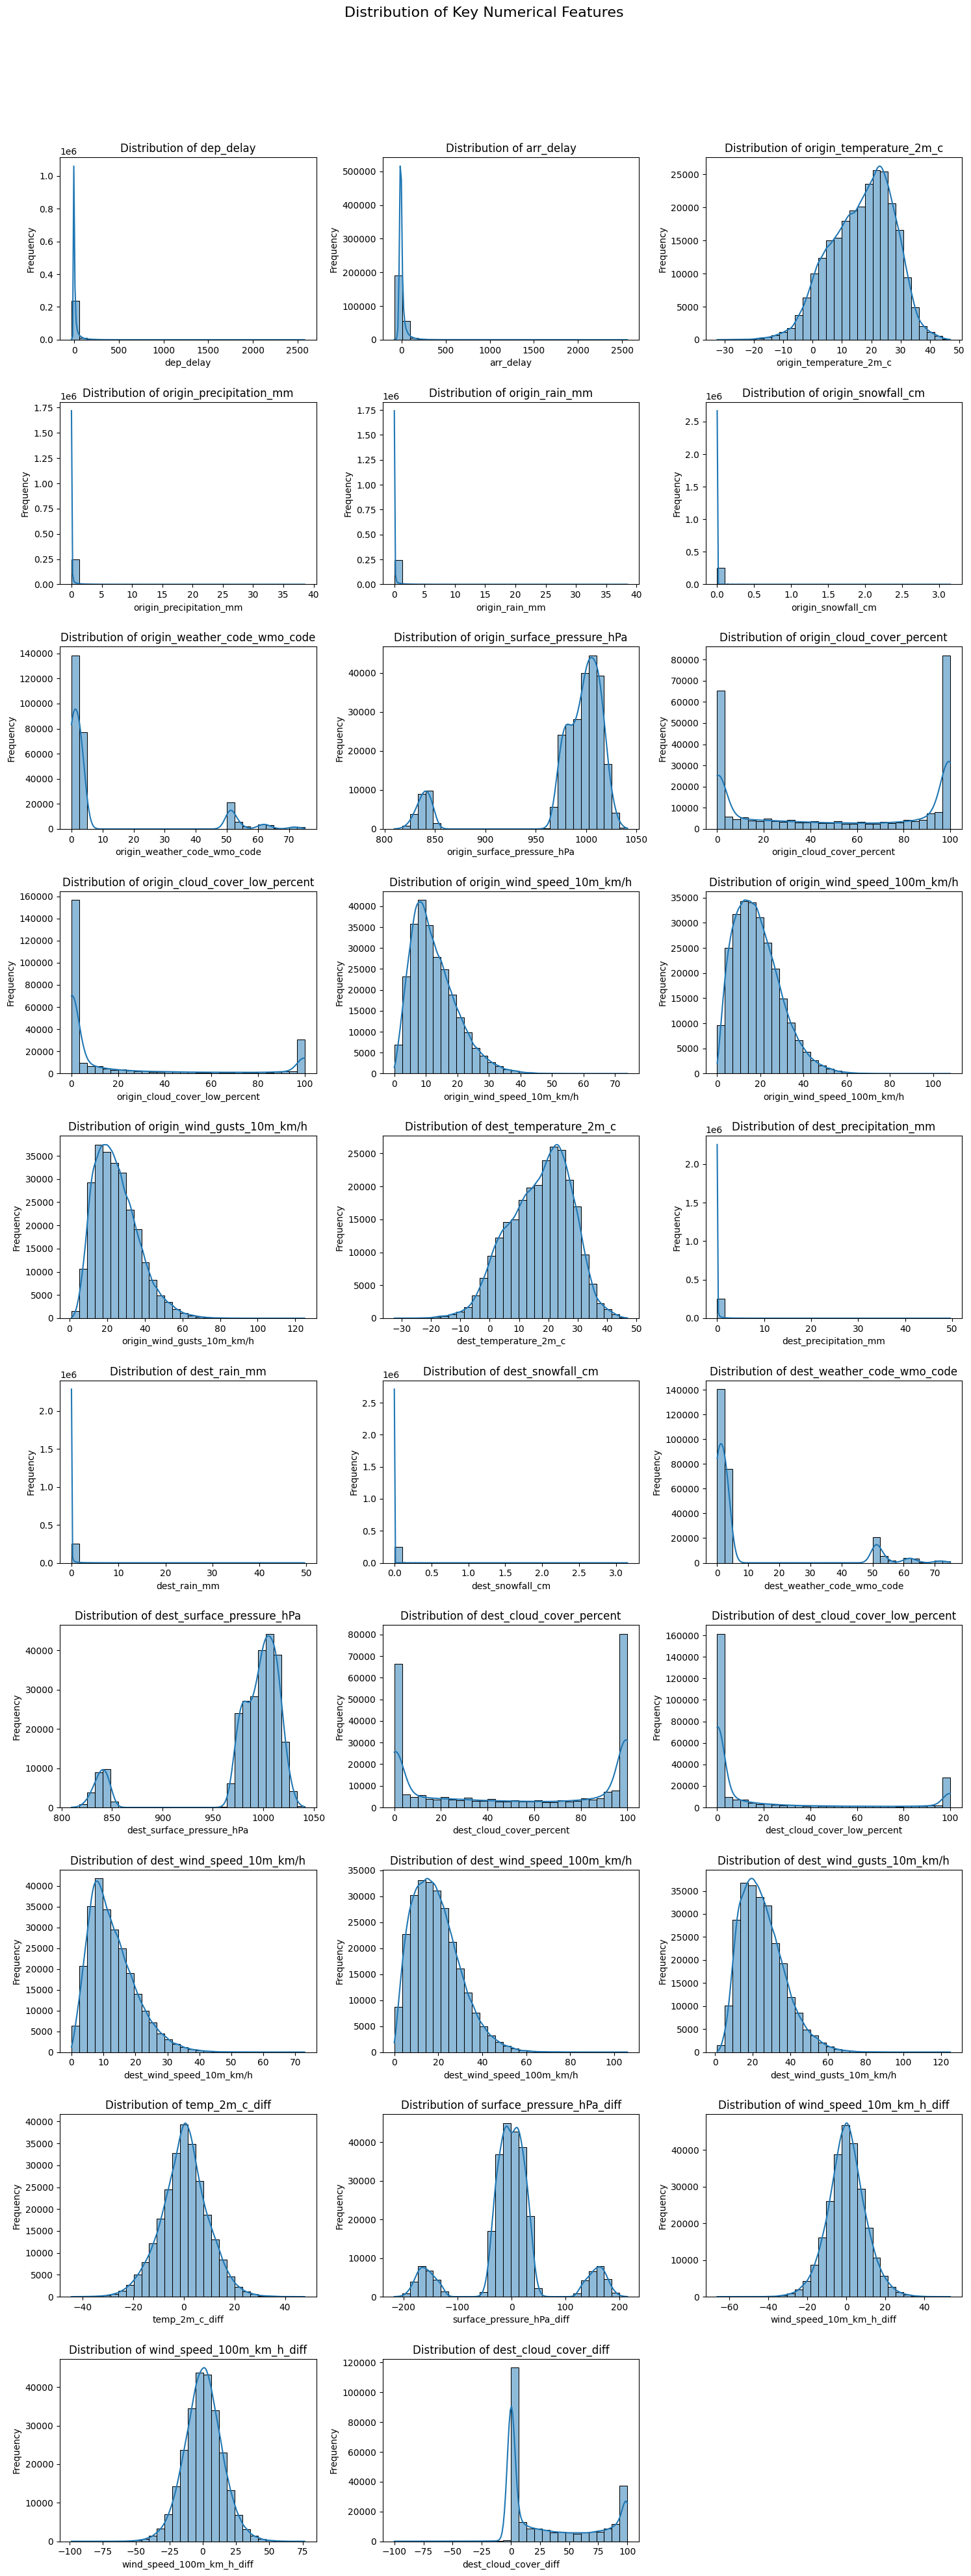

✅ PASS: Histograms generated for key numerical features.


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n=== 6. DATA DISTRIBUTION VISUALIZATION ===")

# Select a few key numerical columns for visualization
columns_to_visualize = [
    'dep_delay',
    'arr_delay',
    'origin_temperature_2m_c',
    'origin_precipitation_mm',
    'origin_rain_mm',
    'origin_snowfall_cm',
    'origin_weather_code_wmo_code',
    'origin_surface_pressure_hPa',
    'origin_cloud_cover_percent',
    'origin_cloud_cover_low_percent',
    'origin_wind_speed_10m_km/h',
    'origin_wind_speed_100m_km/h',
    'origin_wind_direction_10m_degree',
    'origin_wind_direction_100m_degree',
    'origin_wind_gusts_10m_km/h',
    'dest_temperature_2m_c',
    'dest_precipitation_mm',
    'dest_rain_mm',
    'dest_snowfall_cm',
    'dest_weather_code_wmo_code',
    'dest_surface_pressure_hPa',
    'dest_cloud_cover_percent',
    'dest_cloud_cover_low_percent',
    'dest_wind_speed_10m_km/h',
    'dest_wind_speed_100m_km/h',
    'dest_wind_direction_10m_degree',
    'dest_wind_direction_100m_degree',
    'dest_wind_gusts_10m_km/h',
    'temp_2m_c_diff',
    'surface_pressure_hPa_diff',
    'wind_speed_10m_km_h_diff',
    'wind_speed_100m_km_h_diff',
    'dest_cloud_cover_diff'
]

# Filter for columns that actually exist in the DataFrame
existing_columns = [col for col in columns_to_visualize if col in final_merged_df.columns]

if not existing_columns:
    print("No selected columns found in the DataFrame to visualize.")
else:
    # Determine the number of rows and columns for the subplots
    n_cols = 3  # You can adjust this number
    n_rows = (len(existing_columns) + n_cols - 1) // n_cols

    plt.figure(figsize=(n_cols * 5, n_rows * 4))
    plt.suptitle('Distribution of Key Numerical Features', y=1.02, fontsize=16)

    for i, col in enumerate(existing_columns):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.histplot(final_merged_df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()
    print("✅ PASS: Histograms generated for key numerical features.")

## DB Connection

In [77]:
# import csv
# import os
# import pandas as pd
# import io
# from sklearn.preprocessing import LabelEncoder
# from sqlalchemy import create_engine
# from typing import Dict, List, Optional

# try:
#     import psycopg2
#     from psycopg2.extras import RealDictCursor
# except ImportError as exc:
#     raise SystemExit(
#         "psycopg2 is required. Install with: pip install psycopg2-binary"
#     ) from exc


In [78]:
# def get_conn():
#     return psycopg2.connect(
#         host=os.getenv("PGHOST", "dpg-d5cb930gjchc73cik7b0-a.singapore-postgres.render.com"),
#         port=int(os.getenv("PGPORT", "5432")),
#         dbname=os.getenv("PGDATABASE", "etl_dw_prod"),
#         user=os.getenv("PGUSER", "etl_user"),
#         password=os.getenv("PGPASSWORD", "h7UOWHH8PAhFFdA2ApIqikiXlz6DqGik"),
#         sslmode="require",
#         connect_timeout=10
#     )

In [79]:
# try:
#     with get_conn() as conn:
#         with conn.cursor(cursor_factory=RealDictCursor) as cur:
#             cur.execute("SELECT now() AS server_time, current_database() AS db;")
#             print(cur.fetchone())
#     print("✅ CONNECTED TO PROD DB")
# except Exception as e:
#     print("❌ CONNECTION FAILED")
#     raise e


In [80]:
# def load_final_merged_df_to_public_gold(final_merged_df, table_name="gold"):
#     # 1) Normalize column names -> valid Postgres identifiers
#     df = final_merged_df.copy()
#     df.columns = (
#         df.columns.astype(str)
#         .str.strip()
#         .str.lower()
#         .str.replace(" ", "_", regex=False)
#         .str.replace("/", "_", regex=False)
#         .str.replace("-", "_", regex=False)
#         .str.replace("°", "deg", regex=False)
#     )

#     conn = get_conn()
#     try:
#         with conn.cursor() as cur:
#             # 2) Ensure we are using public schema
#             cur.execute("SET search_path TO public;")

#             # 3) Recreate public.gold using inferred types (TEXT fallback)
#             pg_type = {}
#             for c in df.columns:
#                 dt = df[c].dtype
#                 if str(dt).startswith("int"):
#                     pg_type[c] = "BIGINT"
#                 elif str(dt).startswith("float"):
#                     pg_type[c] = "DOUBLE PRECISION"
#                 elif str(dt).startswith("bool"):
#                     pg_type[c] = "BOOLEAN"
#                 elif "datetime" in str(dt):
#                     pg_type[c] = "TIMESTAMP"
#                 else:
#                     pg_type[c] = "TEXT"

#             cols_ddl = ",\n  ".join([f"{c} {pg_type[c]}" for c in df.columns])

#             # DROP + CREATE table in public
#             cur.execute(f'DROP TABLE IF EXISTS public."{table_name}" CASCADE;')
#             cur.execute(f'CREATE TABLE public."{table_name}" (\n  {cols_ddl}\n);')

#             # 4) Fast load via COPY into public.table
#             buf = io.StringIO()
#             df.to_csv(buf, index=False, header=False)
#             buf.seek(0)

#             cols_list = ", ".join(df.columns)
#             cur.copy_expert(
#                 f'COPY public."{table_name}" ({cols_list}) FROM STDIN WITH (FORMAT CSV)',
#                 buf
#             )

#         conn.commit()

#         # 5) Validate rowcount
#         with conn.cursor() as cur:
#             cur.execute(f'SELECT COUNT(*) FROM public."{table_name}";')
#             n = cur.fetchone()[0]

#         print(f"✅ Loaded {n:,} rows into public.{table_name}")

#     finally:
#         conn.close()


# # RUN
# load_final_merged_df_to_public_gold(final_merged_df, table_name="gold")

In [81]:
# import pandas as pd
# import io
# import os
# from sqlalchemy import create_engine

# try:
#     import psycopg2
#     from psycopg2.extras import RealDictCursor
# except ImportError as exc:
#     raise SystemExit(
#         "psycopg2 is required. Install with: pip install psycopg2-binary"
#     ) from exc

# def get_conn():
#     return psycopg2.connect(
#         host=os.getenv("PGHOST", "dpg-d5cb930gjchc73cik7b0-a.singapore-postgres.render.com"),
#         port=int(os.getenv("PGPORT", "5432")),
#         dbname=os.getenv("PGDATABASE", "etl_dw_prod"),
#         user=os.getenv("PGUSER", "etl_user"),
#         password=os.getenv("PGPASSWORD", "h7UOWHH8PAhFFdA2ApIqikiXlz6DqGik"),
#         sslmode="require",
#         connect_timeout=10
#     )

# def normalize_col_names(df):
#     df.columns = (
#         df.columns.astype(str)
#         .str.strip()
#         .str.lower()
#         .str.replace(" ", "_", regex=False)
#         .str.replace("/", "_", regex=False)
#         .str.replace("-", "_", regex=False)
#         .str.replace("°", "deg", regex=False)
#         .str.replace("(", "", regex=False)
#         .str.replace(")", "", regex=False)
#         .str.replace("%", "percent", regex=False)
#         .str.replace("mm", "mm", regex=False)
#         .str.replace("hpa", "hpa", regex=False)
#         .str.replace("cm", "cm", regex=False)
#         .str.replace("wmo_code", "wmo_code", regex=False)
#         .str.replace("km_h", "kmh", regex=False)
#     )
#     return df

# def load_data_to_postgres(df, table_name, conn_func, if_exists='replace'):
#     df_copy = df.copy()
#     df_copy = normalize_col_names(df_copy)

#     with conn_func() as conn:
#         with conn.cursor() as cur:
#             cur.execute("SET search_path TO public;")

#             # Infer PostgreSQL data types
#             pg_type = {}
#             for c in df_copy.columns:
#                 dt = df_copy[c].dtype
#                 if str(dt).startswith("int"):
#                     pg_type[c] = "BIGINT"
#                 elif str(dt).startswith("float"):
#                     pg_type[c] = "DOUBLE PRECISION"
#                 elif str(dt).startswith("bool"):
#                     pg_type[c] = "BOOLEAN"
#                 elif "datetime" in str(dt):
#                     pg_type[c] = "TIMESTAMP"
#                 else:
#                     pg_type[c] = "TEXT"

#             cols_ddl = ",\n  ".join([f'"{c}" {pg_type[c]}' for c in df_copy.columns])

#             # Drop and create table
#             if if_exists == 'replace':
#                 cur.execute(f'DROP TABLE IF EXISTS public."{table_name}" CASCADE;')
#             cur.execute(f'CREATE TABLE public."{table_name}" (\n  {cols_ddl}\n);')

#             # Fast load via COPY
#             buf = io.StringIO()
#             df_copy.to_csv(buf, index=False, header=False)
#             buf.seek(0)

#             cols_list = ", ".join([f'"{col}"' for col in df_copy.columns])
#             cur.copy_expert(
#                 f'COPY public."{table_name}" ({cols_list}) FROM STDIN WITH (FORMAT CSV)',
#                 buf
#             )
#         conn.commit()

#         with conn.cursor() as cur:
#             cur.execute(f'SELECT COUNT(*) FROM public."{table_name}";')
#             n = cur.fetchone()[0]
#         print(f"✅ Loaded {n:,} rows into public.{table_name}")

# def load_star_schema_to_dw(df):
#     # 1. Rename encoded columns to represent keys
#     df_star = df.copy()
#     df_star = df_star.rename(columns={
#         'airlines_encode': 'airline_key',
#         'origin_cities_encode': 'origin_city_key',
#         'dest_cities_encode': 'dest_city_key'
#     })

#     # 2. Create Dimension Tables
#     print("\n--- Creating Dimension Tables ---")

#     # Dim Airline
#     dim_airline = df_star[['airline_key', 'airline', 'airline_code']].drop_duplicates(subset=['airline_key']).sort_values('airline_key').reset_index(drop=True)
#     load_data_to_postgres(dim_airline, "dim_airline", get_conn)

#     # Dim Origin City
#     dim_origin_city = df_star[['origin_city_key', 'origin_city', 'origin']].drop_duplicates(subset=['origin_city_key']).sort_values('origin_city_key').reset_index(drop=True)
#     load_data_to_postgres(dim_origin_city, "dim_origin_city", get_conn)

#     # Dim Destination City
#     dim_dest_city = df_star[['dest_city_key', 'dest_city', 'dest']].drop_duplicates(subset=['dest_city_key']).sort_values('dest_city_key').reset_index(drop=True)
#     load_data_to_postgres(dim_dest_city, "dim_dest_city", get_conn)

#     # Dim Date
#     dim_date = df_star[['fl_date']].drop_duplicates().copy()
#     dim_date['date_key'] = dim_date['fl_date'] # Use fl_date as date_key
#     dim_date['year'] = dim_date['fl_date'].astype(str).str[:4].astype(int)
#     dim_date['month'] = dim_date['fl_date'].astype(str).str[4:6].astype(int)
#     dim_date['day'] = dim_date['fl_date'].astype(str).str[6:8].astype(int)
#     dim_date['day_of_week'] = pd.to_datetime(dim_date['fl_date'].astype(str)).dt.dayofweek # 0=Monday, 6=Sunday
#     dim_date['day_name'] = pd.to_datetime(dim_date['fl_date'].astype(str)).dt.day_name()
#     dim_date['quarter'] = pd.to_datetime(dim_date['fl_date'].astype(str)).dt.quarter
#     dim_date = dim_date[['date_key', 'year', 'month', 'day', 'day_of_week', 'day_name', 'quarter']].sort_values('date_key').reset_index(drop=True)
#     load_data_to_postgres(dim_date, "dim_date", get_conn)

#     # 3. Create Fact Table
#     print("\n--- Creating Fact Table ---")
#     fact_flights_cols = [
#         'fl_date', 'airline_key', 'origin_city_key', 'dest_city_key',
#         'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off',
#         'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
#         'cancelled', 'diverted', 'crs_elapsed_time', 'elapsed_time', 'air_time',
#         'distance', 'delay_due_carrier', 'delay_due_weather', 'delay_due_nas',
#         'delay_due_security', 'delay_due_late_aircraft',
#         # Weather details (from origin and destination, can be denormalized or kept as measures)
#         'origin_temperature_2m_c', 'origin_precipitation_mm', 'origin_rain_mm',
#         'origin_snowfall_cm', 'origin_weather_code_wmo_code', 'origin_surface_pressure_hpa',
#         'origin_cloud_cover_percent', 'origin_cloud_cover_low_percent', 'origin_wind_speed_10m_kmh',
#         'origin_wind_speed_100m_kmh', 'origin_wind_direction_10m_deg', 'origin_wind_direction_100m_deg',
#         'origin_wind_gusts_10m_kmh',
#         'dest_temperature_2m_c', 'dest_precipitation_mm', 'dest_rain_mm',
#         'dest_snowfall_cm', 'dest_weather_code_wmo_code', 'dest_surface_pressure_hpa',
#         'dest_cloud_cover_percent', 'dest_cloud_cover_low_percent', 'dest_wind_speed_10m_kmh',
#         'dest_wind_speed_100m_kmh', 'dest_wind_direction_10m_deg', 'dest_wind_direction_100m_deg',
#         'dest_wind_gusts_10m_kmh',
#         # Feature engineered columns
#         'temp_2m_c_diff', 'surface_pressure_hpa_diff', 'wind_speed_10m_km_h_diff',
#         'wind_speed_100m_km_h_diff', 'dest_cloud_cover_diff'
#     ]
#     fact_flights = df_star[fact_flights_cols].copy()
#     fact_flights = fact_flights.rename(columns={'fl_date': 'date_key'}) # Rename fl_date to date_key for FK
#     load_data_to_postgres(fact_flights, "fact_flights", get_conn)


# # Run the function to create and load the star schema
# load_star_schema_to_dw(final_merged_df)

### DB - Connection Star Scheme

In [82]:
get_ipython().system('apt-get update')

Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 3,917 B in 1s (3,328 B/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [83]:
get_ipython().system('apt-get install -y postgresql postgresql-contrib')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
postgresql is already the newest version (14+238).
postgresql-contrib is already the newest version (14+238).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [84]:
get_ipython().system('service postgresql start')

 * Starting PostgreSQL 14 database server
   ...done.


In [85]:
get_ipython().system("sudo -u postgres createuser postgres")
get_ipython().system("sudo -u postgres psql -c \"ALTER USER postgres WITH PASSWORD '12345';\"")
get_ipython().system("sudo -u postgres createdb flight_weather")
get_ipython().system("sudo -u postgres psql -c \"GRANT ALL PRIVILEGES ON DATABASE flight_weather TO postgres;\"")

print("PostgreSQL user 'postgres' created and database 'flight_weather' configured.")

createuser: error: creation of new role failed: ERROR:  role "postgres" already exists
ALTER ROLE
createdb: error: database creation failed: ERROR:  database "flight_weather" already exists
GRANT
PostgreSQL user 'postgres' created and database 'flight_weather' configured.


In [86]:
get_ipython().system('pip install psycopg2-binary SQLAlchemy')

In [87]:
import pandas as pd
from sqlalchemy import create_engine
import os

# 1. Define the database connection string
DB_USER = 'postgres'
DB_PASSWORD = '12345'
DB_NAME = 'flight_weather'
DB_HOST = 'localhost'
DB_PORT = '5432'

DATABASE_URL = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

In [88]:
# 2. Create an engine to connect to the PostgreSQL database
engine = create_engine(DATABASE_URL)
print(f"[INFO] PostgreSQL engine created for {DB_NAME} on {DB_HOST}:{DB_PORT}.")


[INFO] PostgreSQL engine created for flight_weather on localhost:5432.


In [89]:
import psycopg2
from psycopg2.extras import RealDictCursor

def get_conn():
    return psycopg2.connect(
        host=DB_HOST,
        port=DB_PORT,
        dbname=DB_NAME,
        user=DB_USER,
        password=DB_PASSWORD,
        sslmode="disable",
        connect_timeout=10
    )

In [90]:
try:
    with get_conn() as conn:
        with conn.cursor(cursor_factory=RealDictCursor) as cur:
            cur.execute("SELECT now() AS server_time, current_database() AS db;")
            print(cur.fetchone())
    print("✅ CONNECTED TO LOCAL DB")
except Exception as e:
    print("❌ CONNECTION FAILED")
    raise e

RealDictRow({'server_time': datetime.datetime(2026, 1, 7, 5, 14, 29, 822672, tzinfo=datetime.timezone.utc), 'db': 'flight_weather'})
✅ CONNECTED TO LOCAL DB


In [91]:
import pandas as pd
import io
import os
from sqlalchemy import create_engine

try:
    import psycopg2
    from psycopg2.extras import RealDictCursor
except ImportError as exc:
    raise SystemExit(
        "psycopg2 is required. Install with: pip install psycopg2-binary"
    ) from exc

def get_conn():
    return psycopg2.connect(
        host=DB_HOST,
        port=DB_PORT,
        dbname=DB_NAME,
        user=DB_USER,
        password=DB_PASSWORD,
        sslmode="disable",
        connect_timeout=10
    )

def normalize_col_names(df):
    df.columns = (
        df.columns.astype(str)
        .str.strip()
        .str.lower()
        .str.replace(" ", "_", regex=False)
        .str.replace("/", "_", regex=False)
        .str.replace("-", "_", regex=False)
        .str.replace("°", "deg", regex=False)
        .str.replace("(", "", regex=False)
        .str.replace(")", "", regex=False)
        .str.replace("%", "percent", regex=False)
        .str.replace("mm", "mm", regex=False)
        .str.replace("hpa", "hpa", regex=False)
        .str.replace("cm", "cm", regex=False)
        .str.replace("wmo_code", "wmo_code", regex=False)
        .str.replace("km_h", "kmh", regex=False)
    )
    return df

def load_data_to_postgres(df, table_name, conn_func, if_exists='replace', primary_key_cols=None, foreign_key_definitions=None):
    df_copy = df.copy()
    df_copy = normalize_col_names(df_copy)

    with conn_func() as conn:
        with conn.cursor() as cur:
            cur.execute("SET search_path TO public;")

            # Infer PostgreSQL data types
            cols_ddl_list = []
            for c in df_copy.columns:
                dt = df_copy[c].dtype
                pg_type = ""
                if str(dt).startswith("int"):
                    pg_type = "BIGINT"
                elif str(dt).startswith("float"):
                    pg_type = "DOUBLE PRECISION"
                elif str(dt).startswith("bool"):
                    pg_type = "BOOLEAN"
                elif "datetime" in str(dt):
                    pg_type = "TIMESTAMP"
                else:
                    pg_type = "TEXT"
                cols_ddl_list.append(f'"{c}" {pg_type}')

            # Add Primary Key constraint if specified
            if primary_key_cols:
                cols_ddl_list.append(f'PRIMARY KEY ({", ".join([f'"{col}"' for col in primary_key_cols])})')

            # Add Foreign Key constraints if specified
            if foreign_key_definitions:
                for fk_def in foreign_key_definitions:
                    local_col = fk_def['local_col']
                    ref_table = fk_def['ref_table']
                    ref_col = fk_def['ref_col']
                    cols_ddl_list.append(f'FOREIGN KEY ("{local_col}") REFERENCES public."{ref_table}" ("{ref_col}")')

            create_table_sql = f'CREATE TABLE public."{table_name}" (\n  {",\n  ".join(cols_ddl_list)}\n);'

            # Drop and create table
            if if_exists == 'replace':
                cur.execute(f'DROP TABLE IF EXISTS public."{table_name}" CASCADE;')
            cur.execute(create_table_sql)

            # Fast load via COPY
            buf = io.StringIO()
            df_copy.to_csv(buf, index=False, header=False)
            buf.seek(0)

            cols_list = ", ".join([f'"{col}"' for col in df_copy.columns])
            cur.copy_expert(
                f'COPY public."{table_name}" ({cols_list}) FROM STDIN WITH (FORMAT CSV)',
                buf
            )
        conn.commit()

        with conn.cursor() as cur:
            cur.execute(f'SELECT COUNT(*) FROM public."{table_name}";')
            n = cur.fetchone()[0]
        print(f"✅ Loaded {n:,} rows into public.{table_name}")

def load_star_schema_to_dw(df):
    # 1. Rename encoded columns to represent keys
    df_star = df.copy()
    df_star = df_star.rename(columns={
        'airlines_encode': 'airline_key',
        'origin_cities_encode': 'origin_city_key',
        'dest_cities_encode': 'dest_city_key'
    })

    # Normalize column names in df_star before selecting for fact table
    df_star = normalize_col_names(df_star)

    # 2. Create Dimension Tables
    print("\n--- Creating Dimension Tables with PKs ---")

    # Dim Airline
    dim_airline = df_star[['airline_key', 'airline', 'airline_code']].drop_duplicates(subset=['airline_key']).sort_values('airline_key').reset_index(drop=True)
    load_data_to_postgres(dim_airline, "dim_airline", get_conn, primary_key_cols=['airline_key'])

    # Dim Origin City
    dim_origin_city = df_star[['origin_city_key', 'origin_city', 'origin']].drop_duplicates(subset=['origin_city_key']).sort_values('origin_city_key').reset_index(drop=True)
    load_data_to_postgres(dim_origin_city, "dim_origin_city", get_conn, primary_key_cols=['origin_city_key'])

    # Dim Destination City
    dim_dest_city = df_star[['dest_city_key', 'dest_city', 'dest']].drop_duplicates(subset=['dest_city_key']).sort_values('dest_city_key').reset_index(drop=True)
    load_data_to_postgres(dim_dest_city, "dim_dest_city", get_conn, primary_key_cols=['dest_city_key'])

    # Dim Date
    dim_date = df_star[['fl_date']].drop_duplicates().copy()
    dim_date['date_key'] = dim_date['fl_date'] # Use fl_date as date_key
    dim_date['year'] = dim_date['fl_date'].astype(str).str[:4].astype(int)
    dim_date['month'] = dim_date['fl_date'].astype(str).str[4:6].astype(int)
    dim_date['day'] = dim_date['fl_date'].astype(str).str[6:8].astype(int)
    dim_date['day_of_week'] = pd.to_datetime(dim_date['fl_date'].astype(str)).dt.dayofweek # 0=Monday, 6=Sunday
    dim_date['day_name'] = pd.to_datetime(dim_date['fl_date'].astype(str)).dt.day_name()
    dim_date['quarter'] = pd.to_datetime(dim_date['fl_date'].astype(str)).dt.quarter
    dim_date = dim_date[['date_key', 'year', 'month', 'day', 'day_of_week', 'day_name', 'quarter']].sort_values('date_key').reset_index(drop=True)
    load_data_to_postgres(dim_date, "dim_date", get_conn, primary_key_cols=['date_key'])

    # 3. Create Fact Table
    print("\n--- Creating Fact Table with FKs ---")
    # Get all columns from df_star (which is already normalized) except the original object columns for dimensions
    # and also remove the non-key columns that are part of other dimensions
    fact_flights_columns_to_keep = [
        col for col in df_star.columns if col not in [
            'airline', 'airline_code', 'origin', 'origin_city', 'dest', 'dest_city',
            'crs_dep_time_rounded', 'crs_arr_time_rounded', 'origin_time', 'dest_time' # these are intermediary or raw string columns
        ]
    ]

    fact_flights = df_star[fact_flights_columns_to_keep].copy()
    fact_flights = fact_flights.rename(columns={'fl_date': 'date_key'}) # Rename fl_date to date_key for FK

    foreign_keys_for_fact = [
        {'local_col': 'airline_key', 'ref_table': 'dim_airline', 'ref_col': 'airline_key'},
        {'local_col': 'origin_city_key', 'ref_table': 'dim_origin_city', 'ref_col': 'origin_city_key'},
        {'local_col': 'dest_city_key', 'ref_table': 'dim_dest_city', 'ref_col': 'dest_city_key'},
        {'local_col': 'date_key', 'ref_table': 'dim_date', 'ref_col': 'date_key'}
    ]

    load_data_to_postgres(fact_flights, "fact_flights", get_conn, foreign_key_definitions=foreign_keys_for_fact)


# Run the function to create and load the star schema
load_star_schema_to_dw(final_merged_df)


--- Creating Dimension Tables with PKs ---
✅ Loaded 16 rows into public.dim_airline
✅ Loaded 10 rows into public.dim_origin_city
✅ Loaded 10 rows into public.dim_dest_city
✅ Loaded 1,704 rows into public.dim_date

--- Creating Fact Table with FKs ---
✅ Loaded 255,119 rows into public.fact_flights


#### Buat file dump (.sql)

In [92]:
import os
import shutil

dest_dir = '/content/drive/MyDrive/bigdata_final_project/warehouse'
os.makedirs(dest_dir, exist_ok=True)
print(f"[INFO] Ensured directory exists: {dest_dir}")

database_name = 'flight_weather' # Changed to the correct database name
output_file_path = os.path.join(dest_dir, f'{database_name}.sql')

# Command to dump the PostgreSQL database
get_ipython().system(f'sudo -u postgres pg_dump {database_name} > {output_file_path}')

print(f"[INFO] Database '{database_name}' dumped to '{output_file_path}'")

[INFO] Ensured directory exists: /content/drive/MyDrive/bigdata_final_project/warehouse
[INFO] Database 'flight_weather' dumped to '/content/drive/MyDrive/bigdata_final_project/warehouse/flight_weather.sql'


In [93]:
import pandas as pd

def read_from_db(table_name):
    try:
        with get_conn() as conn:
            df = pd.read_sql(f'SELECT * FROM public.\"{table_name}\"', conn)
            print(f"✅ Successfully read {len(df)} rows from table '{table_name}'.")
            return df
    except Exception as e:
        print(f"❌ Failed to read from table '{table_name}': {e}")
        return None

# Example usage: Read data from the fact_flights table
fact_flights_df = read_from_db("fact_flights")

if fact_flights_df is not None:
    print("\nFirst 5 rows of fact_flights_df:")
    print(fact_flights_df.head())
    print("\nShape of fact_flights_df:", fact_flights_df.shape)

/tmp/ipython-input-2290715506.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f'SELECT * FROM public.\"{table_name}\"', conn)


✅ Successfully read 255119 rows from table 'fact_flights'.

First 5 rows of fact_flights_df:
   date_key  dot_code  fl_number  crs_dep_time  dep_time  dep_delay  taxi_out  \
0  20230212     20416        590           530       527         -3        11   
1  20190324     20416        906          1530      1526         -4        14   
2  20190423     19977        498          1330      1329         -1        23   
3  20191102     19805       2520          1851      1859          8        13   
4  20220102     20452       3467          1935         0          0         0   

   wheels_off  wheels_on  taxi_in  ...  dest_wind_speed_10m_kmh  \
0         538        658        8  ...                      6.3   
1        1540       1830       15  ...                     18.0   
2        1352       1612        3  ...                     14.7   
3        1912       2058       12  ...                     17.0   
4           0          0        0  ...                     18.1   

   dest_wind_spee

In [94]:
dim_airline_df = read_from_db("dim_airline")

if dim_airline_df is not None:
    print("\nFirst 5 rows of dim_airline_df:")
    print(dim_airline_df.head())
    print("\nShape of dim_airline_df:", dim_airline_df.shape)

✅ Successfully read 16 rows from table 'dim_airline'.

First 5 rows of dim_airline_df:
   airline_key                 airline airline_code
0            0    Alaska Airlines Inc.           AS
1            1           Allegiant Air           G4
2            2  American Airlines Inc.           AA
3            3    Delta Air Lines Inc.           DL
4            4       Endeavor Air Inc.           9E

Shape of dim_airline_df: (16, 3)


/tmp/ipython-input-2290715506.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f'SELECT * FROM public.\"{table_name}\"', conn)
